# ‰ªªÂä°1. ËØªÂèñÊï∞ÊçÆÈõÜÂπ∂ÂèØËßÜÂåñ

- Â∞ÜÁªôÂÆöÁöÑ3‰∏™Êï∞ÊçÆÈõÜÊñá‰ª∂Âà©Áî®numpyËøõË°åËØªÂèñÔºåÂπ∂ËøõË°åÂèØËßÜÂåñ„ÄÇ  
- Áî±‰∫éÊï∞ÊçÆÈõÜËøáÂ§öÔºåÂú®Â∞èÂõæ‰∏≠ÊòæÁ§∫ÊïàÊûú‰∏ç‰Ω≥ÔºåÊïÖËÄåÊ∑ªÂä† `alpha` ÂèÇÊï∞Êù•ÊéßÂà∂ÈÄèÊòéÂ∫¶ÔºåÊèêÈ´òÂ∞èÂõæÁöÑÂèØËØªÊÄß„ÄÇ

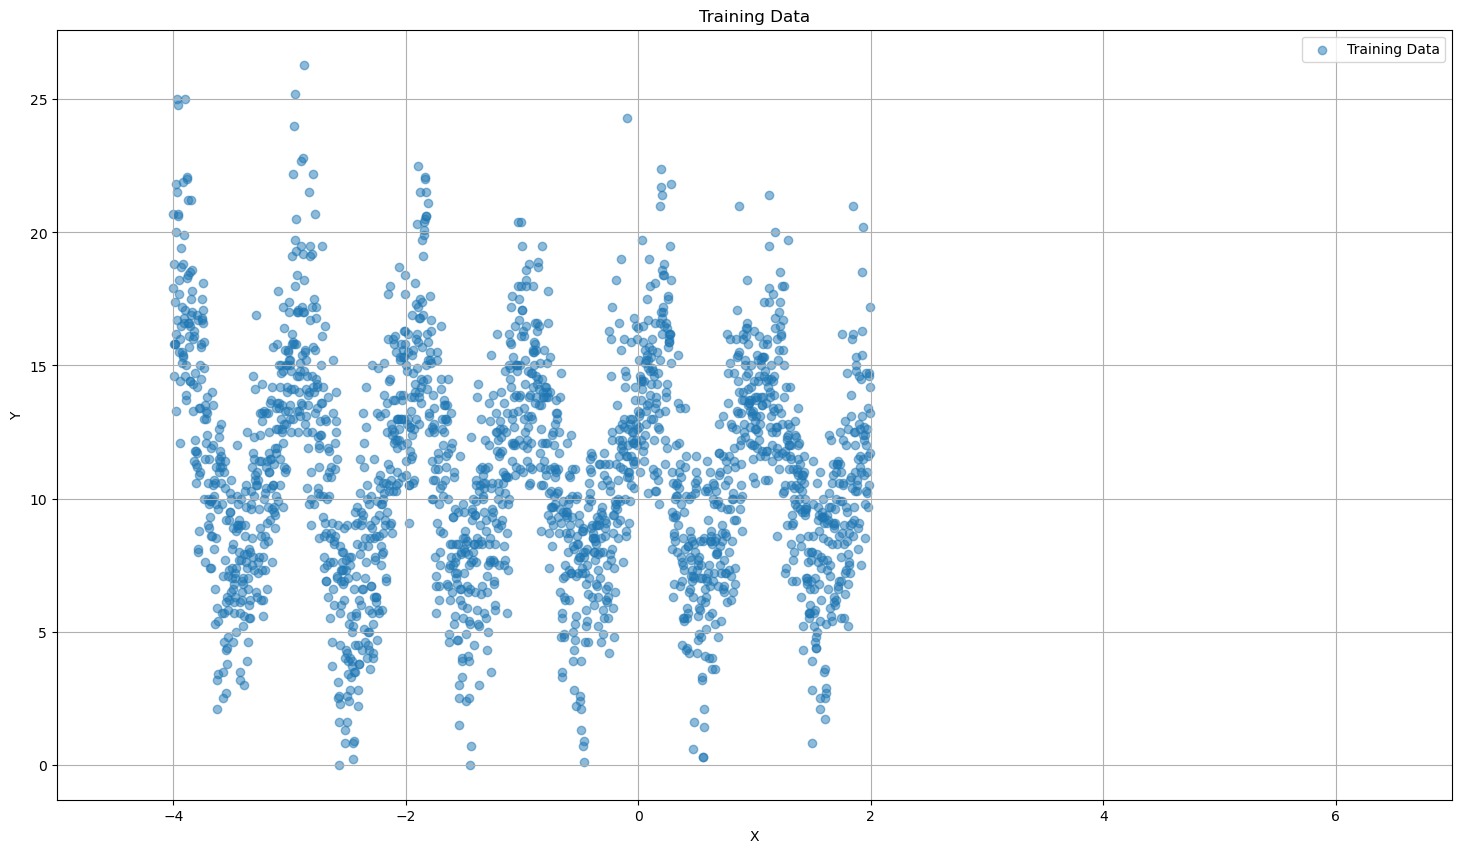

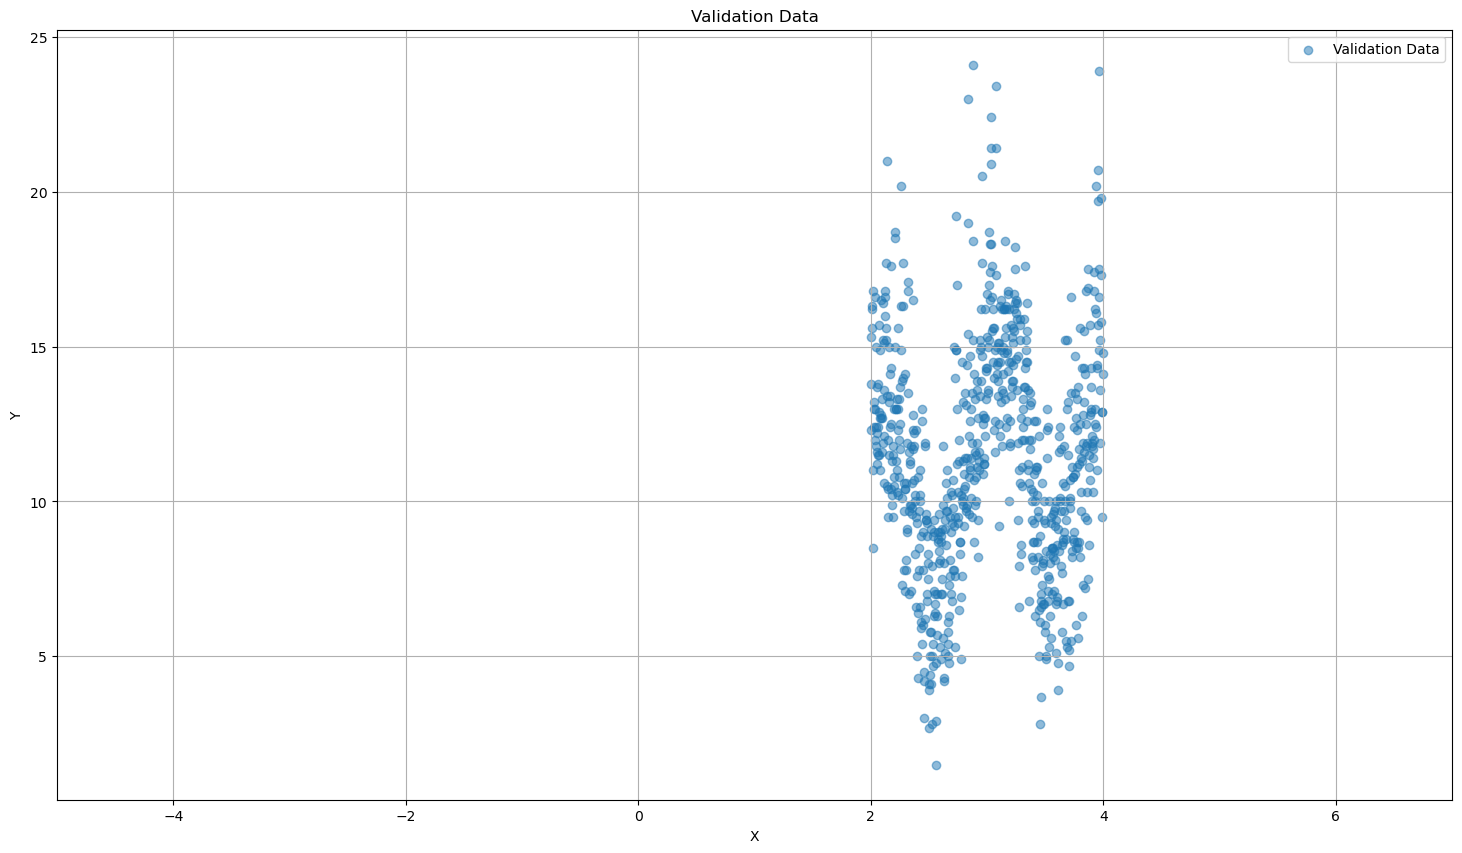

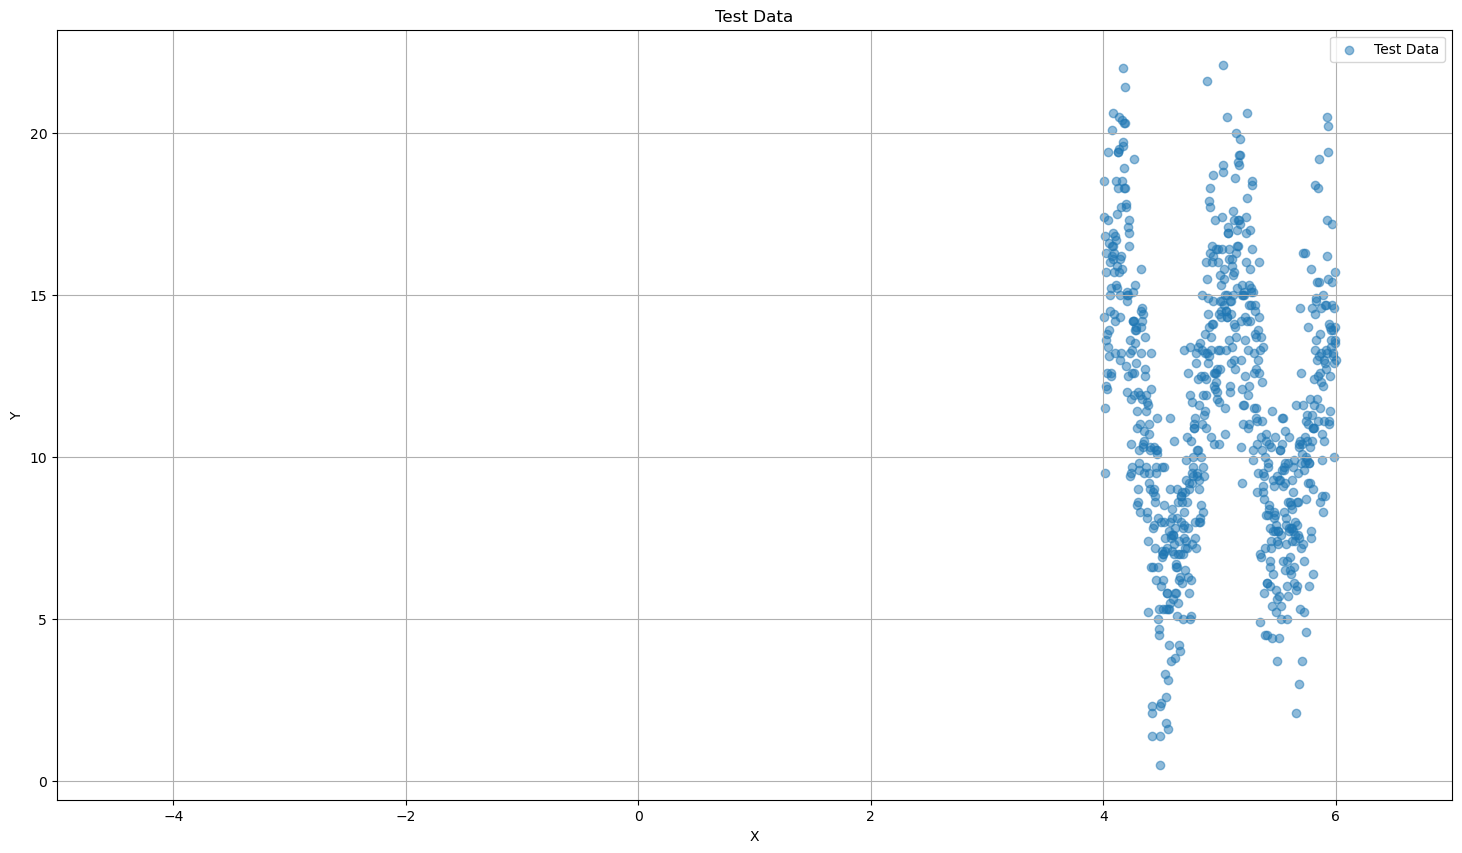

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# ËØªÂèñËÆ≠ÁªÉÈõÜ„ÄÅÈ™åËØÅÈõÜÂíåÊµãËØïÈõÜÊï∞ÊçÆ
data_train = np.genfromtxt("data_train.csv", delimiter=",", skip_header= 1)
data_valid = np.genfromtxt("data_valid.csv", delimiter=",", skip_header= 1)
data_test = np.genfromtxt("data_test.csv", delimiter=",", skip_header= 1)

X_train, Y_train = data_train[:, 0], data_train[:, 1]
X_valid, Y_valid = data_valid[:, 0], data_valid[:, 1]
X_test, Y_test = data_test[:, 0], data_test[:, 1]



# ÂèØËßÜÂåñËÆ≠ÁªÉÈõÜÊï∞ÊçÆ
plt.figure(figsize=(18,10))
plt.grid(True)  # ÊòæÁ§∫ÂùêÊ†áÁ≥ª
plt.scatter(X_train, Y_train, label="Training Data", alpha=0.5)
plt.xlim(-5,7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training Data")
plt.legend()
plt.show()

# ÂèØËßÜÂåñÈ™åËØÅÈõÜÊï∞ÊçÆ
plt.figure(figsize=(18,10))
plt.grid(True) 
plt.scatter(X_valid, Y_valid, label="Validation Data", alpha=0.5)
plt.xlim(-5,7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Validation Data")
plt.legend()
plt.show()

# ÂèØËßÜÂåñÊµãËØïÈõÜÊï∞ÊçÆ
plt.figure(figsize=(18,10))
plt.grid(True) 
plt.scatter(X_test, Y_test, label="Test Data", alpha=0.5)
plt.xlim(-5,7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Test Data")
plt.legend()
plt.show()


# ‰ªªÂä°2. ÂÆûÁé∞Âõõ‰∏™Ê†∏ÂáΩÊï∞ÔºåÂπ∂ÈÄöËøáÂáΩÊï∞ÂõæÂÉèÂàÜÊûêÊ†∏ÂáΩÊï∞ÊÄßË¥®  


## 2.1 ÂÆûÁé∞ÁªôÂÆöÁöÑÂõõ‰∏™ÂáΩÊï∞
### 1. Linear kernel (linear_kernel) : $ ùëò(ùê±,ùê≥)=\sum^{F}_{ùëì=1}ùë•_{ùëì}ùëß_{ùëì} =ùê±^{‚ä§}ùê≥ $
### 2. polynomial kernel (poly_kernel) : $ ùëò(ùê±,ùê≥)= (ùê±^{‚ä§}ùê≥+ùëê)^{p} $
ÂÖ∂‰∏≠Ôºå$ p $ ‰∏∫Ë∂ÖÂèÇÊï∞
### 3. Gaussian kernel (sqexp_kernel) : $ ùëò(ùê±,ùê≥)=\exp(‚àí\frac{(ùê±‚àíùê≥)^{‚ä§}(ùê±‚àíùê≥)}{l^{2}}) = \exp(-\frac{\sum^{F}_{ùëì=1}(x_{f}-z_{f})^{2}}{l^{2}}) $
ÂÖ∂‰∏≠Ôºå$ l $ ‰∏∫Ë∂ÖÂèÇÊï∞
### 4. Periodic kernel (periodic_kernel) : $ ùëò(ùê±, ùê≥) = \exp(-\frac{1}{2}\frac{(\sin(\frac{\pi}{p}(ùê±-ùê≥)))^2}{l^{2}})$
ÂÖ∂‰∏≠Ôºå$ p $,$ l $ Âùá‰∏∫Ë∂ÖÂèÇÊï∞

In [36]:
# Á∫øÊÄßÊ†∏
def linear_kernel(x, z):
    return np.dot(x.T, z)

# Â§öÈ°πÂºèÊ†∏
def poly_kernel(x, z, c = 3, p = 1 ):
    return (np.dot(x.T, z) + c) ** p

# È´òÊñØÊ†∏
def gaussian_kernel(x, z, l=1):
    k = np.exp(-np.dot((x-z).T, (x-z)) / (l ** 2))
    return k

# Âë®ÊúüÊ†∏
def periodic_kernel(x, z, p=2, l=2):
    return np.exp(-0.5 * (np.sin((np.pi / p) * np.linalg.norm(x - z)) ** 2) / (l ** 2))


## 2.2 ÂØπ‰∫é‰∏äËø∞4‰∏™Ê†∏ÂáΩÊï∞ÔºåÂàÜÂà´ÁªòÂà∂Âá∫‰∏§‰∏™ÂáΩÊï∞: ùëò(ùë•, 1)Ôºå ùëò(ùë•, 0)ÁöÑÂõæÂÉè

In [37]:
# ÁîüÊàê‰∏ÄÁªÑ x ÂÄº
x = np.linspace(-6, 6, 100)

Text(0, 0.5, 'k(x, 0)')

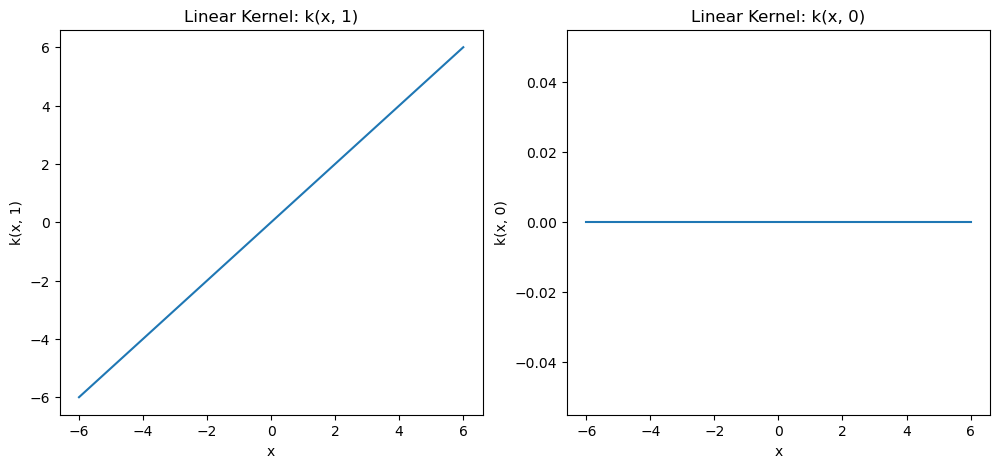

In [38]:
# Á∫øÊÄßÊ†∏-ÂáΩÊï∞
k_linear_1 = np.array([linear_kernel(x_i, 1) for x_i in x])
k_linear_0 = np.array([linear_kernel(x_i, 0) for x_i in x])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, k_linear_1)
plt.title("Linear Kernel: k(x, 1)")
plt.xlabel("x")
plt.ylabel("k(x, 1)")

plt.subplot(1, 2, 2)
plt.plot(x, k_linear_0)
plt.title("Linear Kernel: k(x, 0)")
plt.xlabel("x")
plt.ylabel("k(x, 0)")

Text(0, 0.5, 'k(x, 0)')

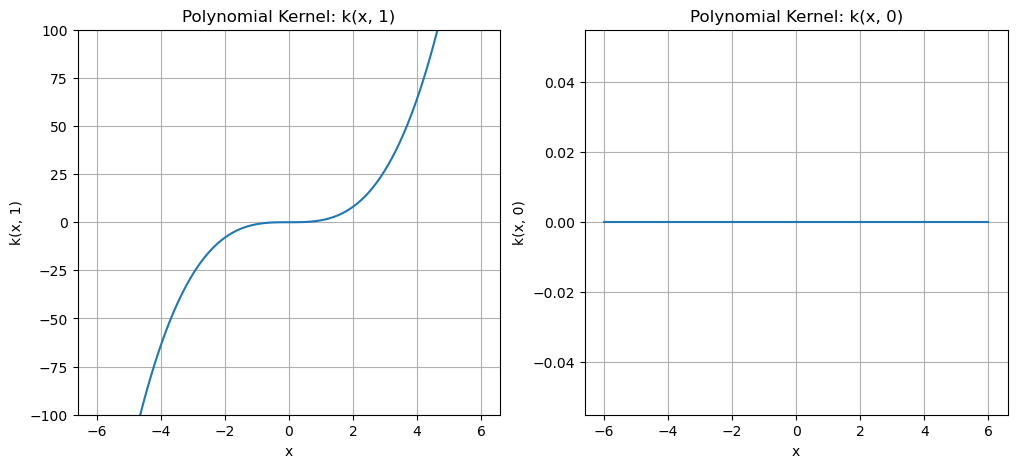

In [39]:
# Â§öÈ°πÂºèÊ†∏-ÂáΩÊï∞
k_poly_1 = np.array([poly_kernel(x_i, 1, 0, 3) for x_i in x])
k_poly_0 = np.array([poly_kernel(x_i, 0, 0, 3) for x_i in x])


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, k_poly_1)
plt.grid(True)
plt.ylim(-100,100)
plt.title("Polynomial Kernel: k(x, 1)")
plt.xlabel("x")
plt.ylabel("k(x, 1)")

plt.subplot(1, 2, 2)
plt.plot(x, k_poly_0)
plt.grid(True)
plt.title("Polynomial Kernel: k(x, 0)")
plt.xlabel("x")
plt.ylabel("k(x, 0)")

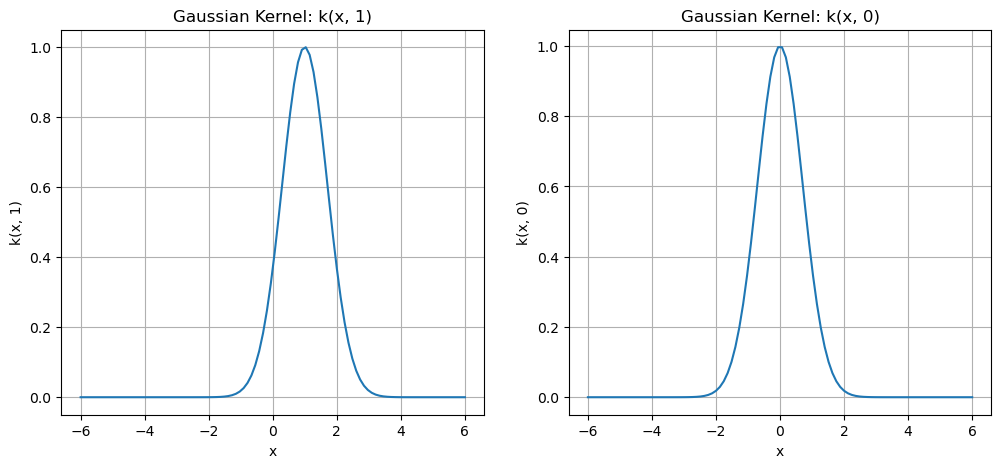

In [40]:
# È´òÊñØÊ†∏-ÂáΩÊï∞
k_gaussian_1 = np.array([gaussian_kernel(x_i, 1, 1) for x_i in x])
k_gaussian_0 = np.array([gaussian_kernel(x_i, 0, 1) for x_i in x])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, k_gaussian_1)
plt.title("Gaussian Kernel: k(x, 1)")
plt.xlabel("x")
plt.ylabel("k(x, 1)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, k_gaussian_0)
plt.title("Gaussian Kernel: k(x, 0)")
plt.xlabel("x")
plt.ylabel("k(x, 0)")
plt.grid(True)

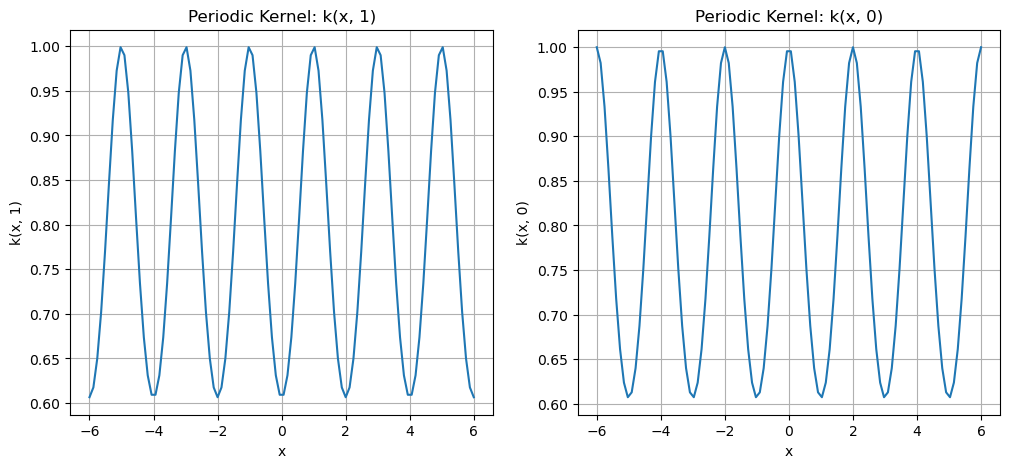

In [41]:
# Âë®ÊúüÊ†∏-ÂáΩÊï∞
k_periodic_1 = np.array([periodic_kernel(x_i, 1, 2, 1) for x_i in x])
k_periodic_0 = np.array([periodic_kernel(x_i, 0, 2, 1) for x_i in x])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, k_periodic_1)
plt.title("Periodic Kernel: k(x, 1)")
plt.xlabel("x")
plt.ylabel("k(x, 1)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, k_periodic_0)
plt.title("Periodic Kernel: k(x, 0)")
plt.xlabel("x")
plt.ylabel("k(x, 0)")
plt.grid(True)

## 2.3 ÈÄöËøáÁªòÂõæÂàÜÊûêË∂ÖÂèÇÊï∞ $l$,$p$ÂØπ‰∫éPoly_Kernel, Gaussian_KernelÂíåPeriodic_KernelÁöÑÂΩ±Âìç

### 2.3.1 Â§öÈ°πÂºèÊ†∏ÂáΩÊï∞
ÈÄâÊã© $k(x,1,0,0)$ ‰Ωú‰∏∫ËßÇÂØüÁöÑÂü∫ÂáÜÔºåÂú®Ê≠§ÂáΩÊï∞Âü∫Á°Ä‰∏äË∞ÉËäÇË∂ÖÂèÇÊï∞ $p$ ,ËßÇÂØüÂáΩÊï∞ÂõæÂÉè

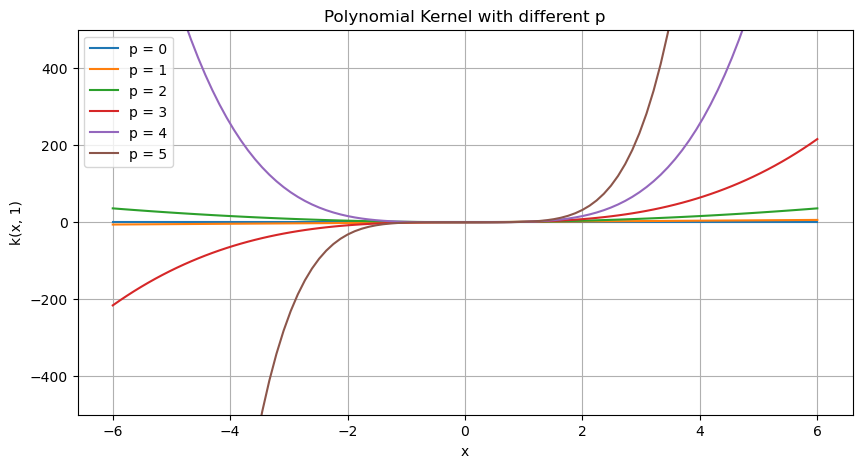

In [42]:
# ‰∏çÂêåÁöÑ p ÂÄº
p_values = range(0, 6)

plt.figure(figsize=(10, 5))

for p in p_values:
    k_poly_test = np.array([poly_kernel(x_i, 1, 0, p) for x_i in x])
    label = f"p = {p}"
    plt.plot(x, k_poly_test, label=label)

plt.title("Polynomial Kernel with different p")
plt.ylim(-500,500)
plt.xlabel("x")
plt.ylabel("k(x, 1)")
plt.legend()
plt.grid(True)
plt.show()




‰ªéPolynomial kernelÁöÑÂÆö‰πâÂáΩÊï∞$ (ùê±^{‚ä§}ùê≥+ùëê)^{p} $‰∏≠‰∏çÈöæÁúãÂá∫Ôºå $p$ ÂØπ‰∫éÂáΩÊï∞ÁöÑÂΩ±ÂìçÊòØÊåáÊï∞Á∫ßÁöÑÔºåÂõ†Ê≠§ $p$ ÁöÑÂèòÂåñ‰ºöÊåáÊï∞Á∫ßÁöÑÂΩ±ÂìçËØ•ÂáΩÊï∞ÔºåËøôÁöÑÁ°Æ‰πüÂèçÊò†Âà∞‰∫ÜÂõæÂÉè‰∏≠
+ ÂΩì $ x>0 $Êó∂ÔºåÈöèÁùÄ $p$ ÁöÑÂ¢ûÂ§ßÔºåÔºåÂáΩÊï∞ÈÄíÂ¢ûÁöÑË∂ãÂäøË∂äÂ§ßÔºåÂπ∂‰∏îÂ∑ÆË∑ù‰∏∫ÊåáÊï∞Á∫ßÔºõ
+ ÂΩì $ x<0 $Êó∂ÔºåÁî±‰∫é $x$ ‰∏∫Ë¥üÊï∞ÔºåÂõ†Ê≠§ÈöèÁùÄ $p$ ÁöÑÂ¢ûÂ§ßÔºö
    + ÂΩì $p$ ‰∏∫ÂÅ∂Êï∞ÔºåÊï¥‰ΩìÂáΩÊï∞‰∏∫ÂÅ∂ÂáΩÊï∞ÔºåÂõ†Ê≠§ÂáΩÊï∞ÈÄíÂáèÁöÑË∂ãÂäøÂ¢ûÂ§ßÔºåÂπ∂‰∏îÂ∑ÆË∑ù‰∏∫ÊåáÊï∞Á∫ßÔºõ
    + ÂΩì $p$ ‰∏∫Â•áÊï∞ÔºåÊï¥‰ΩìÂáΩÊï∞‰∏∫Â•áÂáΩÊï∞ÔºåÂõ†Ê≠§ÂáΩÊï∞ÈÄíÂ¢ûÁöÑË∂ãÂäøÂ¢ûÂ§ßÔºåÂπ∂‰∏îÂ∑ÆË∑ù‰∏∫ÊåáÊï∞Á∫ß„ÄÇ

### 2.3.2 È´òÊñØÊ†∏ÂáΩÊï∞
ÈÄâÊã© $k(x,0,1)$ ‰Ωú‰∏∫ËßÇÂØüÁöÑÂü∫ÂáÜÔºåÂú®Ê≠§ÂáΩÊï∞Âü∫Á°Ä‰∏äË∞ÉËäÇË∂ÖÂèÇÊï∞ $l$ ,ËßÇÂØüÂáΩÊï∞ÂõæÂÉè( $l$ ‰Ωú‰∏∫ÂàÜÊØç‰∏çËÉΩ‰∏∫0)

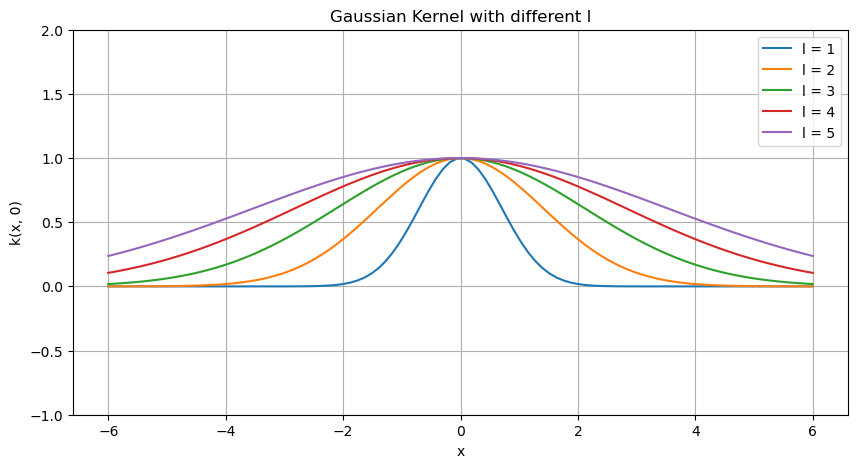

In [43]:
# ‰∏çÂêåÁöÑ l ÂÄº
l_values = range(1, 6)

plt.figure(figsize=(10, 5))

for l in l_values:
    k_gaus_test = np.array([gaussian_kernel(x_i, 0, l) for x_i in x])
    label = f"l = {l}"
    plt.plot(x, k_gaus_test, label=label)

plt.title("Gaussian Kernel with different l")
plt.ylim(-1,2)
plt.xlabel("x")
plt.ylabel("k(x, 0)")
plt.legend()
plt.grid(True)
plt.show()

‰ªéÂõæ‰∏≠ÂèØ‰ª•ÊòéÊòæÁúãÂá∫ÔºåËæÉÂ∞èÁöÑ $l$ ÂÄº‰ºöÂØºËá¥Ê†∏ÂáΩÊï∞Êõ¥Âä†Â∞ñÈîêÔºåËÄåËæÉÂ§ßÁöÑ $l$ ÂÄº‰ºöÂØºËá¥Ê†∏ÂáΩÊï∞Êõ¥Âä†Âπ≥Âù¶„ÄÇ   
ÊüêÁßçÊÑè‰πâ‰∏äÔºå$l$ ÂÜ≥ÂÆö‰∫ÜÊï∞ÊçÆÁÇπ‰πãÈó¥ÁöÑÁõ∏‰ººÊÄßË°∞ÂáèÈÄüÂ∫¶„ÄÇÂú®Ê†∏ÂáΩÊï∞Â§ÑÁêÜÂéüÊï∞ÊçÆÁâπÂæÅÂêëÈáèÁöÑËøáÁ®ã‰∏≠Ôºå**ËæÉÂ∞è**ÁöÑ $l$ ÊÑèÂë≥ÁùÄ‰ªÖÂú®Ë∑ùÁ¶ª**ËæÉÂ∞è**ÁöÑÊï∞ÊçÆÁÇπÈó¥Áõ∏‰ººÊÄßÊâç‰ºöÊØîËæÉÈ´ò„ÄÇ  

Âú®Êú¨‰æãÁöÑ $k(x,0,l)$ ‰∏≠Ôºö
1. ÂΩì $x$ ‰∏é 0 Ë∂äÊé•ËøëÊó∂Ôºå$K$ ÁöÑÂÄºË∂äÊé•Ëøë 1ÔºåË°®Á§∫ÂÆÉ‰ª¨‰πãÈó¥ÁöÑÁõ∏‰ººÊÄßÊõ¥È´ò„ÄÇ
2. ÂΩì $x$ ‰∏é 0 Ë∂äËøúÊó∂Ôºå$K$ ÁöÑÂÄºË∂äÊé•Ëøë 0ÔºåË°®Á§∫ÂÆÉ‰ª¨‰πãÈó¥ÁöÑÁõ∏‰ººÊÄßËæÉ‰Ωé„ÄÇ
3. ÈöèÁùÄ$l$ÁöÑ‰∏çÂêåÔºåÁõ∏‰ººÂ∫¶ÂèòÂåñÁöÑÈÄüÂ∫¶‰πü‰∏çÂêå

### 2.3.3 Âë®ÊúüÊ†∏ÂáΩÊï∞
‰∏∫Êñπ‰æøÂú®Âõæ‰∏äËßÇÂØüÔºå‰ª•$k(x_i, 0, 2, 1)$‰∏∫Âü∫ÂáÜÔºåË∞ÉÊï¥ÂèÇÊï∞$l$,$p$ÔºåËßÇÂØüÂáΩÊï∞ÂõæÂÉè( $l$ ‰Ωú‰∏∫ÂàÜÊØç‰∏çËÉΩ‰∏∫0)  
ÂÖàËßÇÂØü$p$ÔºåÂÜçËßÇÂØü$l$

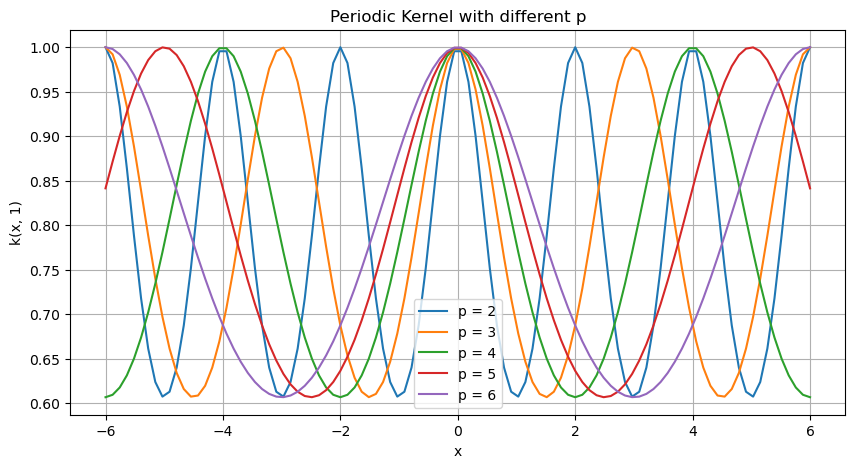

In [44]:
# ‰∏çÂêåÁöÑ p ÂÄº
p_values = range(2, 7)

plt.figure(figsize=(10, 5))

for p in p_values:
    k_poly_test = np.array([periodic_kernel(x_i, 0, p, 1) for x_i in x])
    label = f"p = {p}"
    plt.plot(x, k_poly_test, label=label)

plt.title("Periodic Kernel with different p")
plt.xlabel("x")
plt.ylabel("k(x, 1)")
plt.legend()
plt.grid(True)
plt.show()

$p$ ÁöÑÂΩ±ÂìçÔºö  
1. Áî±ÂõæÂÉèÂèØÁü•ÔºåÈöèÁùÄ$p$ÁöÑÂ¢ûÂ§ßÔºåÂõæÂÉèÊõ≤Á∫øÁî±‰∏≠ËΩ¥($x=0$)ÂêëÂë®Âõ¥Êâ©Â§ßÔºåÂë®ÊúüÈÄêÊ∏êÊâ©Â§ßÔºåËæÉÂ§ßÁöÑ$p$ÂÄºÂØπÂ∫îÁùÄËæÉÂ§ßÁöÑÂë®ÊúüÔºåÔºõ
1. ÁªìÂêàÂÖ∑‰ΩìÂÖ¨Âºè‰∏≠ÁöÑ $$\frac{(\sin(\frac{\pi}{p}(ùê±-ùê≥)))^2}{l^{2}}$$ ÈÉ®ÂàÜÂèØÁü•,$p$ÊéßÂà∂ÁùÄ‚ÄúÂë®ÊúüÊ†∏ÂáΩÊï∞‚ÄùÁöÑÂë®ÊúüÔºåÂç≥Ê≠£Âº¶ÂáΩÊï∞Âë®Êúü‰∏∫$2p$Ôºõ
1. ÈÄöËøáÂØπ‰∫é$p$ÁöÑË∞ÉÊï¥ÔºåËÉΩÂ§ü‰ΩøÊ†∏ÂáΩÊï∞Êõ¥Â•ΩÁöÑÈÄÇÂ∫îÊï∞ÊçÆÊú¨Ë∫´ÁöÑÂë®ÊúüÊÄßÔºàÂ¶ÇÊûúÊúâÁöÑËØùÔºâ„ÄÇ

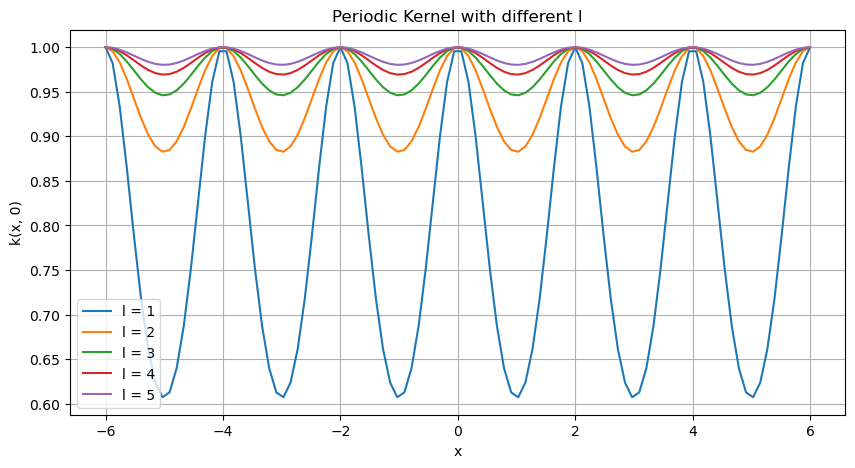

In [45]:
# ‰∏çÂêåÁöÑ l ÂÄº
l_values = range(1, 6)

plt.figure(figsize=(10, 5))

for l in l_values:
    k_gaus_test = np.array([periodic_kernel(x_i, 0, 2, l) for x_i in x])
    label = f"l = {l}"
    plt.plot(x, k_gaus_test, label=label)

plt.title("Periodic Kernel with different l")
plt.xlabel("x")
plt.ylabel("k(x, 0)")
plt.legend()
plt.grid(True)
plt.show()

$l$ ÁöÑÂΩ±ÂìçÔºö  
1. Áî±ÂõæÂÉèÂèØÁü•ÔºåÈöèÁùÄlÁöÑÂ¢ûÂ§ßÔºåÂáΩÊï∞ÂÄºÁöÑÊúÄÂÄºÈÄêÊ∏êÁº©Â∞èÔºõ
2. ÁªìÂêàÂÖ∑‰ΩìÂÖ¨Âºè‰∏≠ÁöÑ $$\frac{(\sin(\frac{\pi}{p}(ùê±-ùê≥)))^2}{l^{2}}$$ ÈÉ®ÂàÜÂèØÁü•,$l$ÂèñÂÄºË∂äÂ§ßÔºåÂáΩÊï∞ÂÄºË∂äÂ∞èÔºåÁ¨¶ÂêàËßÇÂØüÂà∞ÁöÑÂõæÂΩ¢Ôºõ
3. ‰∏éÈ´òÊñØÊ†∏ÂáΩÊï∞Á±ª‰ººÔºåÂú®‰∏Ä‰∏™Âë®ÊúüÂÜÖÔºå$l$‰πüÂΩ±ÂìçÁùÄÁâπÂæÅÂÄºÈó¥ÁöÑÁõ∏ÊÄßÂ∫¶,$l$Ë∂äÂ§ßÔºåÊ†∏ÂáΩÊï∞Ë∂äÂπ≥Êªë.

# ‰ªªÂä°3. ÂÆûÁé∞kernel Ridge RegressionÔºàKRRÔºâÊ®°Âûã
1. Âü∫‰∫éÂâçËø∞4‰∏™Ê†∏ÂáΩÊï∞Ôºå ÂàÜÂà´ÂÆûÁé∞‰∏â‰∏™‰∏çÂêåÁöÑKRRÊ®°ÂûãÔºåÂπ∂Áî®‚Äúdata_train.csv‚ÄùËøõË°åÊ®°ÂûãËÆ≠ÁªÉ;  
1. Âü∫‰∫é‚Äúdata_valid.csv‚ÄùÁî®grid search (Scikit-Learn GridSearchCV)ÊñπÊ≥ïÈÄâÊã©Ê†∏ÂáΩÊï∞‰∏≠ÊúÄ‰ºòË∂ÖÂèÇÊï∞;  
1. ÊúÄÂêéÔºåÂú®data_test.csv‰∏äËøõË°åÊ®°ÂûãÈ™åËØÅÔºåÁªôÂá∫‰∏çÂêå Ê†∏ÂõûÂΩíÊ®°ÂûãÁöÑRMSEÂØπÊØîÁªìÊûúÔºåÂπ∂ÂØπËØ•ÁªìÊûúËøõË°åÂàÜÊûê„ÄÇ


## 3.1 ÂÆûÁé∞KRRÊ®°ÂûãÔºå‰ΩøÁî®sklearn-GridSearchCVËøõË°åË∂ÖÂèÇÊï∞Ë∞É‰ºò
KRRÊ®°ÂûãÂ¶Ç‰∏ãÊâÄÁ§∫
$$ \hat{y} = K_{\hat{X}X}(\sigma^{2}\lambda I+K_{XX})^{-1}y $$
KRRÁöÑ‰ªªÂä°ÊòØÈÄöËøáÂ≠¶‰π†‰ªé $X$ Âà∞ $y$ ÁöÑÊò†Â∞ÑÂÖ≥Á≥ª$(\sigma^{2}\lambda I+K_{XX})^{-1}y$ÔºåÁÑ∂ÂêéÂ∞ÜËøô‰∏™ÂÖ≥Á≥ªÂ∫îÁî®Âà∞ $\hat{X}$Ôºå‰ª•ÁîüÊàê $\hat{y}$

In [46]:
# # KRRÈúÄË¶Å‰ΩøÁî®‰∏§‰∏™Êï∞ÊçÆÈõÜ x_train -„ÄãXÔºå x_test-„ÄãX_test.
# def krr_predict(X, y, X_test, kernel_func, sigma, lambda_, **kernel_params):
    
#     n = X.shape[0]
#     m = X_test.shape[0]
    
#     # ËÆ°ÁÆóÊ†∏Áü©Èòµ
#     K_XX = np.zeros((n,n))
#     K_XtestX = np.zeros((m,n))

#     for i in range(n):
#         for j in range(n):
#             K_XX[i,j] = kernel_func(X[i], X[j], **kernel_params)
            
#     for i in range(m):
#         for j in range(n):      
#             K_XtestX[i,j] = kernel_func(X_test[i], X[j], **kernel_params)
            
#     # Ê±ÇËß£Œ±ÊùÉÈáçÂêëÈáè     
#     K_XX_inv = np.linalg.inv(sigma**2*lambda_*np.eye(n) + K_XX)
#     alpha = np.dot(K_XX_inv, y)
    
#     #È¢ÑÊµã
#     y_predict = np.dot(K_XtestX, alpha)
    
#     return y_predict

## 3.2 ‰ΩøÁî®sklearn-GridSearchCVËøõË°åË∂ÖÂèÇÊï∞Ë∞É‰ºò
GridSearchCVÊòØÁî®Êù•Êü•ÊâæÊúÄ‰ºòÂèÇÊï∞ÁöÑÂ∏∏Áî®ÊñπÊ≥ïÔºåÂè™ÈúÄË¶ÅÊääÂèÇÊï∞ÁöÑÂÄôÈÄâÈõÜËæìÂÖ•ËøõÂéªÔºåÂ∞±‰ºöËá™Âä®ËøõË°åÊéíÂàóÁªÑÂêàÔºåÁÑ∂ÂêéÈÄâÂá∫ÂæóÂàÜÊúÄÈ´òÁöÑÈÇ£‰∏ÄÁªÑÂèÇÊï∞ÁöÑÊéíÂàó„ÄÇ  
ÂÖ∂ÈúÄË¶Å‰∏Ä‰∏™KRRÁ±ª‰Ωú‰∏∫ËæìÂÖ•„ÄÇ

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, make_scorer

# ‰∏∫‰∫Ü‰ΩøÁî®GridSearchCVÈúÄË¶ÅËá™ÂÆö‰πâ‰∏Ä‰∏™krrÁ±ª
class my_krr(BaseEstimator):
    # ÂàùÂßãÂåñÁ±ª
    def __init__(self, kernel_func, sigma=1.0, lambda_=1.0, kernel_params = None):
        self.kernel_func = kernel_func
        self.sigma = sigma
        self.lambda_ = lambda_  # ÂêçÁß∞ÂÜ≤Á™Å
        self.X = None
        self.y = None
        # Á°Æ‰øùÂèÇÊï∞Ê≠£Á°ÆÂàùÂßãÂåñ
        if kernel_params is not None:
            self.kernel_params = kernel_params
        else:
            self.kernel_params = []

    # ÂøÖÂ§áÊñπÊ≥ï,ÂæóÂà∞alphaÁü©Èòµ
    def fit(self, X, y):
        self.X = X
        self.y = y

        # Ê†∏Áü©Èòµ
        n = X.shape[0]
        K_XX = np.zeros((n,n))

        for i in range(n):
            for j in range(n):
                K_XX[i,j] = self.kernel_func(self.X[i], self.X[j], **self.kernel_params)

        # Ê±ÇËß£Œ±ÊùÉÈáçÂêëÈáè     
        K_XX_inv = np.linalg.inv(self.sigma**2*self.lambda_*np.eye(n) + K_XX)
        self.alpha_matrix = np.dot(K_XX_inv, self.y)

        return self

    # È¢ÑÊµã
    def predict(self, X_pred):
        # Ê†∏Áü©Èòµ
        n = self.X.shape[0]
        m = X_pred.shape[0]
        
        K_XpredX = np.zeros((m,n))
        for i in range(m):
            for j in range(n):      
                K_XpredX[i,j] = self.kernel_func(X_pred[i], self.X[j], **self.kernel_params)


        y_predict = np.dot(K_XpredX, self.alpha_matrix)

        return y_predict
    


In [48]:
# Á∫øÊÄßÊ†∏ÂáΩÊï∞Ôºå2‰∏™Ë∂ÖÂèÇÊï∞
line_params = {
    'lambda_':[10, 20, 50],
    'sigma':[10, 20, 50],
    'kernel_params': [{}]
    }
# line_params ={'kernel_params': [{}], 'lambda_': [20], 'sigma': [20]}

line_krr_model = my_krr(kernel_func=linear_kernel)

line_grid_search = GridSearchCV(estimator =line_krr_model, param_grid=line_params, scoring=make_scorer(mean_squared_error))  # ÂàõÂª∫GridSearchCVÂØπË±°
line_grid_search.fit(X_valid, Y_valid)  # ‰ΩøÁî®GridSearchCVËøõË°åÂèÇÊï∞Ë∞ÉÊï¥

print(f"liner kernel KRR best params is {line_grid_search.best_params_}")
line_best_model = line_grid_search.best_estimator_
line_best_model.fit(X_train, Y_train) # ËÆ≠ÁªÉ

liner kernel KRR best params is {'kernel_params': {}, 'lambda_': 50, 'sigma': 50}


my_krr(kernel_func=<function linear_kernel at 0x16e44fec0>, kernel_params={},
       lambda_=50, sigma=50)

In [49]:
# Â§öÈ°πÂºèÊ†∏ÂáΩÊï∞ÔºåË∂ÖÂèÇÊï∞3‰∏™
poly_params = {
    'lambda_':[0.01, 0.1, 1],
    'sigma':[0.01, 0.1, 1],
    'kernel_params': [{'p':1,'c':2},{'p':2,'c':1},{'p':3,'c':1}]
    }
# poly_params = {'kernel_params': [{'p': 5, 'c': 2}], 'lambda_': [0.01], 'sigma': [0.01]}

poly_krr_model = my_krr(kernel_func=poly_kernel, kernel_params={})

poly_grid_search = GridSearchCV(estimator =poly_krr_model, param_grid=poly_params, scoring=make_scorer(mean_squared_error))  # ÂàõÂª∫GridSearchCVÂØπË±°
poly_grid_search.fit(X_valid, Y_valid)  # ‰ΩøÁî®GridSearchCVËøõË°åÂèÇÊï∞Ë∞ÉÊï¥

print(f'poly kernel KRR best params is {poly_grid_search.best_params_}')
poly_best_model = poly_grid_search.best_estimator_
poly_best_model.fit(X_train,Y_train) # ‰ΩøÁî®ËÆ≠ÁªÉÊï∞ÊçÆÈõÜËÆ≠ÁªÉ

# poly kernel KRR best params is {'kernel_params': {'p': 2, 'c': 2}, 'lambda_': 0.01, 'sigma': 0.01}

poly kernel KRR best params is {'kernel_params': {'p': 3, 'c': 1}, 'lambda_': 0.01, 'sigma': 0.01}


my_krr(kernel_func=<function poly_kernel at 0x16e44fe20>,
       kernel_params={'c': 1, 'p': 3}, lambda_=0.01, sigma=0.01)

In [50]:
# È´òÊñØÊ†∏ÂáΩÊï∞ÔºåË∂ÖÂèÇÊï∞3‰∏™
gaus_params = {
    'lambda_':[0.01, 0.1, 1, 10, 100],
    'sigma':[0.01, 0.1, 1],
    'kernel_params': [{'l':1}, {'l':2}]
    }
# gaus_params = {'kernel_params': [{'l': 1}], 'lambda_': [0.01], 'sigma': [0.01]}

gaus_krr_model = my_krr(kernel_func=gaussian_kernel)

gaus_grid_search = GridSearchCV(estimator =gaus_krr_model, param_grid=gaus_params, scoring=make_scorer(mean_squared_error))  # ÂàõÂª∫GridSearchCVÂØπË±°
gaus_grid_search.fit(X_valid, Y_valid)  # ‰ΩøÁî®GridSearchCVËøõË°åÂèÇÊï∞Ë∞ÉÊï¥

print(f'gaus kernel KRR best params is {gaus_grid_search.best_params_}')
gaus_best_model = gaus_grid_search.best_estimator_
gaus_best_model.fit(X_train, Y_train) # ËÆ≠ÁªÉ


gaus kernel KRR best params is {'kernel_params': {'l': 1}, 'lambda_': 0.01, 'sigma': 0.01}


my_krr(kernel_func=<function gaussian_kernel at 0x16e44fa60>,
       kernel_params={'l': 1}, lambda_=0.01, sigma=0.01)

In [51]:
# Âë®ÊúüÊ†∏ÂáΩÊï∞ÔºåË∂ÖÂèÇÊï∞4‰∏™
perio_params = {
    'lambda_':[0.1, 1, 10],
    'sigma':[0.1],
    'kernel_params': [{'p':1,'l':1}, {'p':1,'l':1.5}, {'p':1,'l':2},
                      {'p':2,'l':1}, {'p':2,'l':1.5}, {'p':2,'l':2}
                      ]
    }
# perio_params = {'kernel_params': [{'p': 2, 'l': 1}], 'lambda_': [10], 'sigma': [0.1]}
perio_krr_model = my_krr(kernel_func=periodic_kernel, kernel_params={})
# perio_krr_model.fit(X_train, Y_train)

perio_grid_search = GridSearchCV(estimator =perio_krr_model, param_grid=perio_params, scoring=make_scorer(mean_squared_error))  # ÂàõÂª∫GridSearchCVÂØπË±°
perio_grid_search.fit(X_valid, Y_valid)  # ‰ΩøÁî®GridSearchCVËøõË°åÂèÇÊï∞Ë∞ÉÊï¥

print(f'perio kernel KRR best params is {perio_grid_search.best_params_}')
perio_best_model = perio_grid_search.best_estimator_
perio_best_model.fit(X_train, Y_train) # ËÆ≠ÁªÉ

perio kernel KRR best params is {'kernel_params': {'p': 2, 'l': 2}, 'lambda_': 10, 'sigma': 0.1}


my_krr(kernel_func=<function periodic_kernel at 0x16e44f380>,
       kernel_params={'l': 2, 'p': 2}, lambda_=10, sigma=0.1)

## 3.3 È™åËØÅÊ®°ÂûãÂπ∂ÁªòÂõæ„ÄÅ‰ΩøÁî®RMSEÂàÜÊûê

In [52]:
# Á∫øÊÄß
y_line_krr_pred = line_best_model.predict(X_test)
# print(y_line_krr_pred)
line_krr_rmse = np.sqrt(mean_squared_error(Y_test, y_line_krr_pred))
print(f'linear kernel krr rmse = {line_krr_rmse}')

# Â§öÈ°πÂºè
y_poly_krr_pred = poly_best_model.predict(X_test)
# print(y_poly_krr_pred)
poly_krr_rmse = np.sqrt(mean_squared_error(Y_test, y_poly_krr_pred))
print(f'polynomial kernel krr rmse = {poly_krr_rmse}')

# È´òÊñØ
y_gaus_krr_pred = gaus_best_model.predict(X_test)
# print(y_gaus_krr_pred)
gaus_krr_rmse = np.sqrt(mean_squared_error(Y_test, y_gaus_krr_pred))
print(f'gaussian kernel krr rmse = {gaus_krr_rmse}')

# Âë®Êúü
y_perio_krr_pred = perio_best_model.predict(X_test)
# print(y_perio_krr_pred)
perio_krr_rmse = np.sqrt(mean_squared_error(Y_test, y_perio_krr_pred))
print(f'periodic kernel krr rmse = {perio_krr_rmse}')

linear kernel krr rmse = 13.074802992621674
polynomial kernel krr rmse = 22.688636651502552
gaussian kernel krr rmse = 18.15555617355683
periodic kernel krr rmse = 2.655637047305983


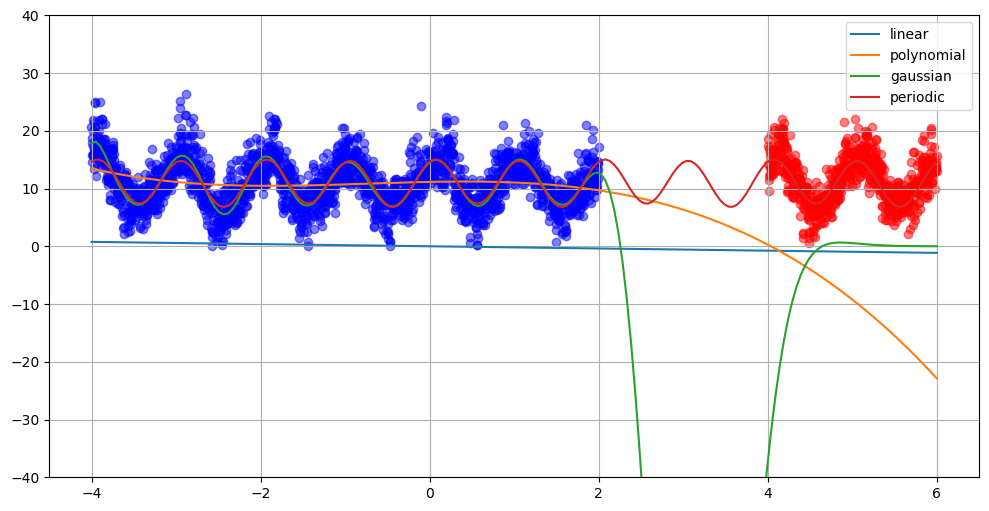

In [53]:
plt.figure(figsize=(12, 6))

plt.scatter(X_train, Y_train, color='b',alpha=0.5)
plt.scatter(X_test, Y_test, color='r',alpha=0.5)


# Âª∂Èïøx‰ΩøÂÖ∂ÂåπÈÖçy
new_x = np.linspace(-4, 6, 200)
plt.ylim(-40,40)
plt.grid(True)
plt.plot(new_x, line_best_model.predict(new_x), label='linear')
plt.plot(new_x, poly_best_model.predict(new_x), label='polynomial')
plt.plot(new_x, gaus_best_model.predict(new_x), label='gaussian')
plt.plot(new_x, perio_best_model.predict(new_x), label='periodic')

plt.legend()

plt.show()

### rmseÁªìÊûúÂàÜÊûêÔºö
1. ÈúÄË¶ÅÊ≥®ÊÑèÁöÑÊòØÔºåË∂ÖÂèÇÊï∞ÂØπ‰∫éÁªìÊûúÊúâÁùÄÈáçÂ§ßÂΩ±Âìç„ÄÇÁî±‰∫éGridSearchCVÂè™‰ºöÂØπÂàóÂá∫ÁöÑÂêÑÁßçÂèØËÉΩÊÄßËøõË°åÊé¢Á©∂ÔºåÂõ†Ê≠§‰πüÊó†Ê≥ï‰øùËØÅÁªìÊûú‰∏ÄÂÆöÊòØÂêÑ‰∏™Ê†∏ÂáΩÊï∞ÁöÑÊúÄ‰ºòËß£ÔºåÂ∞§ÂÖ∂ÊòØÈÄöËøáÁ©∑‰∏æÂ∞ùËØïÁöÑÊñπÊ≥ïËøõË°åÊµãËØïÈùûÂ∏∏Ê∂àËÄóÊÄßËÉΩ‰∏éÊó∂Èó¥ÔºåÊõ¥ËøòÈöæ‰ª•Ëé∑Âæó‰ºòÁßÄÁöÑÁªìÊûúÔºõ
2. ÊïàÊûúÊúÄÂ•ΩÁöÑÊòØÂë®ÊúüÊ†∏ÂáΩÊï∞ÔºåÈÄöËøá‰∏ãÊñπ‰ΩúÂõæ‰πüÂèØ‰ª•ÁúãÂá∫ÔºåÂÖ∂ËÉΩÂ§üÂèçÊò†Êï∞ÊçÆÁöÑÂë®ÊúüÊÄß„ÄÇ
3. ÂÖ∂Ê¨°ÊòØÁ∫øÊÄßÂáΩÊï∞ÂíåÈ´òÊñØÂáΩÊï∞ÔºårmseÁªìÊûú‰∏çËá≥‰∫éÂ§™Â§ß„ÄÇÁ∫øÊÄßÂáΩÊï∞Áî±‰∫éÂè™ËÉΩÂèëÁé∞Á∫øÊÄßÂÖ≥Á≥ªÔºåÊâÄ‰ª•Âá†‰πéÂÆåÂÖ®Êó†Ê≥ïË°®Á§∫Êï∞ÊçÆÈó¥ÁöÑÂÖ≥Á≥ª„ÄÇ
3. È´òÊñØÊ†∏ÂáΩÊï∞Âú®ËÆ≠ÁªÉÊï∞ÊçÆÈõÜÈôÑËøëË°®Áé∞ÊûÅÂ•ΩÔºåÂá†‰πé‰∏éÊï¥‰ΩìË°®Áé∞ÊúÄÂ•ΩÁöÑÂë®ÊúüÂáΩÊï∞Ë°®Áé∞‰∏ÄËá¥Ôºå‰ΩÜÊòØÂú®ÂÖ∂‰ªñÊï∞ÊçÆÈõÜÊó∂ÁöÑË°®Áé∞‰∏ç‰Ω≥Ôºå‰∏éÁ∫øÊÄßÂáΩÊï∞Âá†‰πé‰∏ÄËá¥„ÄÇ
4. ÊïàÊûúÊúÄÂ∑ÆÁöÑÊòØÂ§öÈ°πÂºèÂáΩÊï∞ÔºåÂÆûÈôÖ‰∏äÈÄöËøáÂõæÁâáÂèØ‰ª•ÁúãÂá∫ÔºåÂú®‰∏ÄÈÉ®ÂàÜÊï∞ÊçÆ‰∏≠ÔºåÂÖ∂Ë°®Áé∞Â∞öÂèØÔºå‰ΩÜÊòØÂú®testÈÉ®ÂàÜÔºåÂÆåÂÖ®Ê≤°ÊúâÂèëÁé∞Êï∞ÊçÆÁöÑÁõ∏ÂÖ≥Â∫¶„ÄÇ

# ‰ªªÂä°4 ‰∫åÁª¥Ê†∏SVMÂàÜÁ±ªÈóÆÈ¢ò


## 4.1 ÁîüÊàêÊï∞ÊçÆ
1. Âú®‰∫åÁª¥Âπ≥Èù¢‰∏ä‰ª•‰∏§‰∏™x1x2ÁöÑÈ´òÊñØÂàÜÂ∏ÉÂêÑ‰∏™ÈöèÊú∫ÁîüÊàê80‰∏™Ê†∑Êú¨ÁÇπ
2. ùëã1Ê†∑Êú¨ÁÇπ‰Ωú‰∏∫-1Á±ªÔºå ùëã2 Ê†∑Êú¨ÁÇπ‰Ωú‰∏∫+1Á±ªÔºå
3. ÊåâÁÖß40:20:20ÂàíÂàÜ‰∏∫‚ÄúËÆ≠ÁªÉÈõÜ‚Äù„ÄÅ‚ÄúÈ™åËØÅÈõÜ‚Äù„ÄÅ‚ÄúÊµãËØïÈõÜ‚ÄùÔºåÂπ∂ÁªòÂà∂„ÄÇ

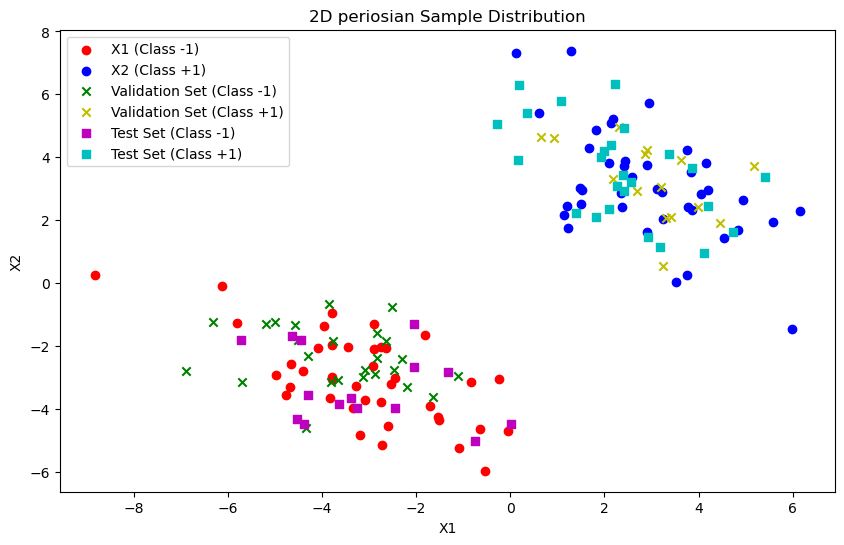

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê‰ª•‰æøÈáçÁé∞ÁªìÊûú
# np.random.seed(0)

# ÁîüÊàêX1ÁöÑÊ†∑Êú¨ÁÇπ
mean_x1 = [-3, -3]
cov_x1 = [[2, -1], [-1, 2]]
x1_samples = np.random.multivariate_normal(mean_x1, cov_x1, 80)

# ÁîüÊàêX2ÁöÑÊ†∑Êú¨ÁÇπ
mean_x2 = [3, 3]
cov_x2 = [[2, -1], [-1, 2]]
x2_samples = np.random.multivariate_normal(mean_x2, cov_x2, 80)

# ÂêàÂπ∂‰∏§‰∏™Á±ªÂà´ÁöÑÊ†∑Êú¨ÁÇπ
all_samples = np.vstack((x1_samples, x2_samples))
labels = np.hstack((np.full(80, -1), np.full(80, 1)))

# ‰∏∫ÊèêÈ´òÊ≥õÂåñËÉΩÂäõÔºåÈöèÊú∫Êâì‰π±Ê†∑Êú¨ÁÇπÁöÑÈ°∫Â∫è
permutation = np.random.permutation(len(all_samples)) # xÁ¥¢ÂºïÁöÑÈöèÊú∫ÊéíÂàó
all_samples = all_samples[permutation]
labels = labels[permutation]

# ÂàíÂàÜÊï∞ÊçÆÈõÜ
train_size = 40
validation_size = 20
test_size = 20

X_train = all_samples[:train_size * 2] # Ââç80
X_val = all_samples[train_size * 2: (train_size + validation_size) * 2] # ‰∏≠40
X_test = all_samples[(train_size + validation_size) * 2:] # Âêé40
y_train = labels[:train_size * 2]
y_val = labels[train_size * 2: (train_size + validation_size) * 2]
y_test = labels[(train_size + validation_size) * 2:]


# ÁªòÂà∂Êï£ÁÇπÂõæ
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == -1][:, 0], # Á¨¨‰∏ÄÁª¥Â∫¶ÁâπÂæÅ
             X_train[y_train == -1][:, 1], # Á¨¨‰∫åÁª¥Â∫¶ÁâπÂæÅ
             label='X1 (Class -1)', c='r')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='X2 (Class +1)', c='b')

plt.scatter(X_val[y_val == -1][:, 0], X_val[y_val == -1][:, 1], label='Validation Set (Class -1)', c='g', marker='x')
plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], label='Validation Set (Class +1)', c='y', marker='x')

plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], label='Test Set (Class -1)', c='m', marker='s')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Test Set (Class +1)', c='c', marker='s')

plt.legend()
plt.title("2D periosian Sample Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


## 4.2 Ê†∏SVMÂÆûÁé∞
Âü∫‰∫épythonÂíånumpyÔºå‰ª•ÂèäcvxoptËÆæËÆ°Âπ∂ÂÆûÁé∞Ê†∏SVMÊ®°Âûã„ÄÇ ÂàÜÂà´Âà©Áî®linear_kernel „ÄÅ ploy_kernel „ÄÅ sqexp_kernel „ÄÅperiodic_kernelÂÆûÁé∞Âõõ‰∏™‰∏çÂêåÁöÑÊ†∏SVMÊ®°Âûã„ÄÇ

In [ ]:
# Á∫øÊÄßÊ†∏
def linear_kernel(x, z):
    return np.dot(x.T, z)

# Â§öÈ°πÂºèÊ†∏
def poly_kernel(x, z, c = 3, p = 1 ):
    return (np.dot(x.T, z) + c) ** p

# È´òÊñØÊ†∏
def gaussian_kernel(x, z, l=1):
    k = np.exp(-np.dot((x-z).T, (x-z)) / (l ** 2))
    return k

# Âë®ÊúüÊ†∏
def periodic_kernel(x, z, p=2, l=2):
    return np.exp(-0.5 * (np.sin((np.pi / p) * np.linalg.norm(x - z)) ** 2) / (l ** 2))

### ÂÖ≥‰∫éÊ†∏SVMÊäÄÂ∑ß
svmÊ†∏ÊäÄÂ∑ßË¶ÅÊ±ÇÁöÑÊ®°ÂûãÂ¶Ç‰∏ãÊâÄÁ§∫  
minÔºö$$ \frac{1}{2} \sum_{i=1}^{n}\sum_{j=1}^{n} \alpha_{i}\alpha_{j}y_{i}y_{j}K(x_{i},x_{j}) - \sum_{i=1}^{n}\alpha_{i} $$ 
Á∫¶ÊùüÔºö $$ \sum_{i=1}^{n} \alpha_{i}y_{i} = 0 $$ 
$$ 0\leq \alpha_{i} \leq C, \text{ for } i = 1,2,...,n $$

Êü•ÈòÖÂà∞ÔºåÁ≠âÂºè‰∏çÁ≠âÂºèËÅîÂêàÁ∫¶ÊùüQPÊ®°ÂûãÂ¶Ç‰∏ã
 $$ \begin{aligned} min &\; \frac{1}{2}x^TPx + q^Tx\\ s.t. & \;a^T_ix = b_i, i \in E\\  &g^T_jx \leq h_j,j\in I\\  \end{aligned} $$




### ÂÖ≥‰∫é[cvxopt.solvers.qp](https://cvxopt.org/userguide/coneprog.html?highlight=qp#cvxopt.solvers.qp)ÊñπÊ≥ï

cvxopt.solvers.qp(P, q[, G, h[, A, b[, solver[, initvals]]]])
ÈúÄË¶Å‰ª•‰∏ãÂèÇÊï∞Ôºö
+ PÔºàProblem MatrixÔºâÔºö‰∏Ä‰∏™ÂØπÁß∞Áü©ÈòµÔºåÈÄöÂ∏∏Ë°®Á§∫‰∏∫‰∫åÈò∂ÂØºÊï∞Áü©Èòµ„ÄÇÂÆÉÂØπÂ∫î‰∫é‰ºòÂåñÈóÆÈ¢òÁöÑ‰∫åÊ¨°È°πÁ≥ªÊï∞„ÄÇ
+ qÔºàLinear Coefficients VectorÔºâÔºö‰∏Ä‰∏™ÂàóÂêëÈáèÔºåÈÄöÂ∏∏Ë°®Á§∫‰∏∫‰∏ÄÈò∂ÂØºÊï∞ÂêëÈáè„ÄÇÂÆÉÂØπÂ∫î‰∫é‰ºòÂåñÈóÆÈ¢òÁöÑ‰∏ÄÊ¨°È°πÁ≥ªÊï∞„ÄÇ
+ GÔºàInequality Constraints MatrixÔºâÔºö‰∏çÁ≠âÂºèÁ∫¶ÊùüÁöÑÁ≥ªÊï∞Áü©Èòµ„ÄÇ
+ hÔºàInequality Constraints VectorÔºâÔºö‰∏çÁ≠âÂºèÁ∫¶ÊùüÁöÑÂè≥‰æßÂêëÈáè„ÄÇ
+ AÔºàEquality Constraints MatrixÔºâÔºöÁ≠âÂºèÁ∫¶ÊùüÁöÑÁ≥ªÊï∞Áü©Èòµ„ÄÇ
+ bÔºàEquality Constraints VectorÔºâÔºöÁ≠âÂºèÁ∫¶ÊùüÁöÑÂè≥‰æßÂêëÈáè„ÄÇ

ÂèòÈáèËÆæËÆ°Â¶Ç‰∏ãÔºö  
1. **ËÆ°ÁÆóÊ†∏Áü©Èòµ $P$**ÔºöÊ†πÊçÆÁªôÂÆöÁöÑÊ†∏ÂáΩÊï∞ $ K(x_{i}, x_{j})$ ÂíåËÆ≠ÁªÉÊï∞ÊçÆÔºåËÆ°ÁÆóÊ†∏Áü©ÈòµP„ÄÇ $P_{ij} = y_{i}y_{j}K(x_{i}, x_{j})$„ÄÇËøô‰∏™Áü©ÈòµÊòØQPÈóÆÈ¢òÁöÑÁõÆÊ†áÂáΩÊï∞Á≥ªÊï∞Áü©Èòµ„ÄÇ

2. **ÁõÆÊ†áÂáΩÊï∞ÁöÑÁ≥ªÊï∞ÂêëÈáè $q$**ÔºöÁõÆÊ†áÂáΩÊï∞ÊòØ $\frac{1}{2} \alpha^T P \alpha - \mathbf{1}^T \alpha$ÔºåÊâÄ‰ª•Á≥ªÊï∞ÂêëÈáè $q = [-1, -1, ..., -1]$ÔºåÂåÖÂê´ n ‰∏™ÂÖÉÁ¥†„ÄÇ

3. **‰∏çÁ≠âÂºèÁ∫¶ÊùüÁöÑÁ≥ªÊï∞Áü©Èòµ $G$ ÂíåÂêëÈáè $h$**Ôºö$G$ ÊòØ $ 2n \times n$ ÁöÑÁü©ÈòµÔºåÊØèË°åÂØπÂ∫î‰∏Ä‰∏™‰∏çÁ≠âÂºèÁ∫¶ÊùüÔºå2nË°åËÉΩÂ§üÂìçÂ∫î2‰∏™‰∏çÁ≠âÂºèÁ∫¶ÊùüÔºåÂâçn‰∏∫$ E $ÔºåÂêénË°å‰∏∫$-E$„ÄÇ $h$ ÊòØ‰∏Ä‰∏™ÈïøÂ∫¶‰∏∫ $2n$ ÁöÑÂàóÂêëÈáèÔºå‰∏∫ $[C, C, C, ..., 0, 0]$„ÄÇ

4. **Á≠âÂºèÁ∫¶ÊùüÁöÑÁ≥ªÊï∞Áü©Èòµ $A$ ÂíåÂêëÈáè $b$**Ôºö$A$ÊòØ‰∏Ä‰∏™ $ 1 \times n$ ÁöÑÁü©ÈòµÔºåÊØèÂàó $ a_{i}=y_i$ „ÄÇ $b$ ÊòØ‰∏Ä‰∏™ÈïøÂ∫¶‰∏∫ 1 ÁöÑ0ÂêëÈáè„ÄÇ



### 4.2.1 Ê®°ÂûãËÆæËÆ°ÈÉ®ÂàÜ

In [ ]:
def get_P(X, y, kernel_func, kernel_params =[{}]):
    n = X.shape[0]
    P = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            temp = y[i]* y[j] * kernel_func(X[i], X[j], **kernel_params)
            P[i,j] = temp

    return P
# print(get_P(X_train,y_train,periosian_kernel))

def get_q(X):
    q =  - np.ones((X.shape[0],1))
    
    return q
# print(get_q(X_train))

def get_G(X):
    G = np.vstack((np.eye(X.shape[0]),-np.eye(X.shape[0])))

    return G
# print(get_G(X_train))

def get_h(X, num_c):
    h = np.vstack((num_c*np.ones((X.shape[0],1)),np.zeros((X.shape[0],1))))

    return h
# print(get_h(X_train, 5))

def get_A(y):
    n = y.shape[0]
    A = np.zeros((1,n))

    for i in range(n):
        A[0][i] = y[i]
    
    return A
# print(get_A(y_train))

def get_b():
    b = np.zeros(1)

    return b
# print(get_b())

# Ë∂ÖÂèÇÊï∞
num_c = 0.1
kernel_func = linear_kernel
kernel_params = {}

P = cvxopt.matrix(get_P(X_train, y_train, kernel_func, kernel_params={}))
q = cvxopt.matrix(get_q(X_train))
G = cvxopt.matrix(get_G(X_train))
h = cvxopt.matrix(get_h(X_train, num_c))
A = cvxopt.matrix(get_A(y_train))
b = cvxopt.matrix(get_b())


solution = cvxopt.solvers.qp(P, q, G, h, A, b)
alpha = np.array(solution['x'])

# ÊâæÂà∞ÊîØÊåÅÂêëÈáè
min_lim = num_c/10
support_vectors_indices = temp_support_vectors_indices = np.where(np.logical_and(num_c  > alpha, alpha > min_lim))[0]

# while True:   # Â∞ΩÂèØËÉΩÂáèÂ∞ëÊîØÊåÅÂêëÈáèÁöÑ‰∏™Êï∞
#     if support_vectors_indices.__len__() > 0 and min_lim < num_c/10 : # Èò≤Ê≠¢Â∞ëÂà∞Ê≤°Êúâ
#         min_lim += (num_c - min_lim)/1000 + 1e-10
#         # min_lim *= 1.00001
#         temp_support_vectors_indices = support_vectors_indices
#         support_vectors_indices = np.where(np.logical_and(num_c  > alpha, alpha > min_lim))[0]
#     else:
#        break
# support_vectors_indices = temp_support_vectors_indices


while True:   
    if support_vectors_indices.__len__() < 1 : # Èò≤Ê≠¢Â∞ëÂà∞Ê≤°Êúâ
        min_lim *= 0.99
        # min_lim *= 1.00001
        support_vectors_indices = np.where(np.logical_and(num_c  > alpha, alpha > min_lim))[0]
    else:
        break

# support_vectors_indices = np.where(np.logical_and(num_c > alpha, alpha > 1e-5))[0]

support_vectors_alpha = alpha[support_vectors_indices]
support_vectors_x = X_train[support_vectors_indices]
support_vectors_y = y_train[support_vectors_indices]

print(support_vectors_indices)

b = 0
b_list=np.zeros(support_vectors_x.shape[0])
# Áî®ÊâÄÊúâÊîØÊåÅÂêëÈáèËÆ°ÁÆó
for j in range(support_vectors_x.shape[0]):
    for i in range(support_vectors_x.shape[0]): 
        b_list[j] += (support_vectors_alpha[i].item() * support_vectors_y[i] * kernel_func(support_vectors_x[i] ,support_vectors_x[j], **kernel_params)).item()
    b_list[j] = (support_vectors_y[j] - b_list[j])
b = np.mean(b_list)
    
# prediction
y_pred = np.zeros(len(X_test))
y = 0
for j in range(X_test.shape[0]):
    y = 0
    for i in range(support_vectors_x.shape[0]):
        y += support_vectors_alpha[i].item() *  support_vectors_y[i] * kernel_func(X_test[j] ,support_vectors_x[i], **kernel_params)

    y_pred[j] = (y + b).item()

y_p = np.sign(y_pred)

# ËÆ°ÁÆóÂáÜÁ°ÆÁéá
accuracy = 0
for i in range(X_test.shape[0]):
    if y_p[i] == y_test[i]:
        accuracy += 1
print("Accuracy:", accuracy)

[ 1 27]
Accuracy: 40


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, make_scorer

# ‰∏∫‰∫Ü‰ΩøÁî®GridSearchCVÈúÄË¶ÅËá™ÂÆö‰πâ‰∏Ä‰∏™Á±ª
class my_ksvm(BaseEstimator):
    # ÂàùÂßãÂåñÁ±ª
    def __init__(self, kernel_func, kernel_params= None, num_c = 0.1, flag = 1):
        self.kernel_func = kernel_func
        self.num_c = num_c
        self.kernel_params = kernel_params
        self.flag = flag # Ëé∑ÂèñÊîØÊåÅÂêëÈáèÁöÑÊñπÊ≥ï


    def fit(self, x, y):
        self.P = cvxopt.matrix(get_P(x, y, kernel_func=self.kernel_func, kernel_params=self.kernel_params))
        self.q = cvxopt.matrix(get_q(x))
        self.G = cvxopt.matrix(get_G(x))
        self.h = cvxopt.matrix(get_h(x, self.num_c))
        self.A = cvxopt.matrix(get_A(y))
        self.b = cvxopt.matrix(get_b())

        self.x = x
        self.y = y

        # ‰ΩøÁî®cvxpotÂ∫ìËøõË°åÈóÆÈ¢òÊ±ÇËß£
        cvxopt.solvers.options['show_progress'] = False
        solution = cvxopt.solvers.qp(self.P, self.q, self.G, self.h, self.A, self.b)
        alpha = np.array(solution['x'])

        # ÊâæÂà∞ÊîØÊåÅÂêëÈáè
        min_lim = 1e-10
        support_vectors_indices = temp_support_vectors_indices = np.where(np.logical_and(self.num_c  > alpha, alpha > min_lim))[0]

        # 1
        if self.flag == 1:
            while True:   # Â∞ΩÂèØËÉΩÂáèÂ∞ëÊîØÊåÅÂêëÈáèÁöÑ‰∏™Êï∞
                if support_vectors_indices.__len__() > 0 and min_lim < num_c/100 : # Èò≤Ê≠¢Â∞ëÂà∞Ê≤°Êúâ
                    min_lim += (self.num_c - min_lim)/1000 + 1e-10
                    # min_lim *= 1.00001
                    temp_support_vectors_indices = support_vectors_indices
                    support_vectors_indices = np.where(np.logical_and(self.num_c  > alpha, alpha > min_lim))[0]
                else:
                    break
            support_vectors_indices = temp_support_vectors_indices
        
        # 2
        if self.flag == 2 :
            min_lim = 1e-3
            while True:   
                if support_vectors_indices.__len__() < 1 : # Èò≤Ê≠¢Â∞ëÂà∞Ê≤°Êúâ
                    min_lim *= 0.5
                    support_vectors_indices = np.where(np.logical_and(self.num_c  > alpha, alpha > min_lim))[0]
                else:
                    break
        
        # 3
        if self.flag == 3 :
            support_vectors_indices = np.where(np.logical_and(num_c > alpha, alpha > 1e-7))[0]

        self.support_vectors_alpha = alpha[support_vectors_indices]
        self.support_vectors_x = x[support_vectors_indices]
        self.support_vectors_y = y[support_vectors_indices]

        b = 0
        b_list=np.zeros(self.support_vectors_x.shape[0])
        # Áî®ÊâÄÊúâÊîØÊåÅÂêëÈáèËÆ°ÁÆó
        for j in range(self.support_vectors_x.shape[0]):
            for i in range(self.support_vectors_x.shape[0]): 
                b_list[j] += (self.support_vectors_alpha[i] * self.support_vectors_y[i] * 
                              self.kernel_func(self.support_vectors_x[i] ,self.support_vectors_x[j], **self.kernel_params)).item()
            b_list[j] = self.support_vectors_y[j] - b_list[j]

        self.b = np.mean(b_list)


        # for i in range(self.support_vectors_x.shape[0]): 
        #     b += (self.support_vectors_alpha[i] * self.support_vectors_y[i] * 
        #                     self.kernel_func(self.support_vectors_x[i] ,self.support_vectors_x[0], **self.kernel_params)).item()
        # self.b = self.support_vectors_y[0] - b
    
        return self

    # Ëé∑ÂèñÈó¥ÈöîÊõ≤Á∫ø
    def project(self, x):
        y_pred_dis = np.zeros(len(x))
        for j in range(x.shape[0]):
            if j % 100 == 0:
                pass
            y = 0
            for i in range(self.support_vectors_x.shape[0]):
                y += (self.support_vectors_alpha[i] *  self.support_vectors_y[i] * 
                        self.kernel_func(x[j] ,self.support_vectors_x[i], **self.kernel_params)).item()
            
            y_pred_dis[j] = y + self.b

        return np.array(y_pred_dis)

    def predict(self, x):
        self.pred_dis = self.project(x)

        return np.sign(self.pred_dis)

    # Ëá™ÂÆö‰πâËØÑÂàÜÊñπÊ≥ïÔºåËøΩÊ±ÇÈ´òÂáÜÁ°ÆÁéáÁöÑÂêåÊó∂‰πüËøΩÊ±Ç‰ΩéÊîØÊåÅÂêëÈáè‰∏™Êï∞
    def score(self, x, y):
        # ‰ΩøÁî®ÊµãËØïÊï∞ÊçÆÈõÜËøõË°åÈ¢ÑÊµã
        y_pred = self.predict(x)

        # ËÆ°ÁÆóÂáÜÁ°ÆÊï∞
        accuracy = 0
        for i in range(x.shape[0]):
            if y_pred[i] == y_test[i]:
                accuracy += 1

        accuracy -= self.support_vectors_x.shape[0]
        # print("Accuracy:", accuracy/x.shape[0])
        return accuracy/x.shape[0]


In [ ]:
# Á∫øÊÄßÊ†∏ÂáΩÊï∞Ôºå1‰∏™Ë∂ÖÂèÇÊï∞
line_params = {
    'num_c':[0.0001, 0.001,0.01, 0.1, 1],
    'flag' : [1,2,3],
    'kernel_params': [{}]
    }
# line_params ={'kernel_params': [{}], 'lambda_': [20], 'sigma': [20]}

line_k_svm = my_ksvm(kernel_func=linear_kernel, kernel_params={})

line_grid_search = GridSearchCV(estimator =line_k_svm, param_grid=line_params)  # ÂàõÂª∫GridSearchCVÂØπË±°
line_grid_search.fit(X_val, y_val)  # ‰ΩøÁî®GridSearchCVËøõË°åÂèÇÊï∞Ë∞ÉÊï¥

print(f"liner kernel svm best params is {line_grid_search.best_params_}")
line_best_model = line_grid_search.best_estimator_

# line_best_model = my_ksvm(kernel_func = linear_kernel, num_c= line_grid_search.best_params_['num_c'],kernel_params= {})

line_best_model.fit(X_train, y_train) # ËÆ≠ÁªÉ
    

liner kernel svm best params is {'flag': 1, 'kernel_params': {}, 'num_c': 0.1}


my_ksvm(kernel_func=<function linear_kernel at 0x16ad4e3e0>, kernel_params={})

In [ ]:
# Â§öÈ°πÂºèÊ†∏ÂáΩÊï∞ÔºåË∂ÖÂèÇÊï∞3‰∏™
poly_params = {
    'num_c':[0.01, 0.1, 1],
    'flag' : [1,2,3],
    'kernel_params': [{'p':2,'c':0},{'p':2,'c':1},{'p':3,'c':1}]
    }

poly_k_svm = my_ksvm(kernel_func=poly_kernel, kernel_params={})

poly_grid_search = GridSearchCV(estimator =poly_k_svm, param_grid=poly_params)  # ÂàõÂª∫GridSearchCVÂØπË±°
poly_grid_search.fit(X_val, y_val)  # ‰ΩøÁî®GridSearchCVËøõË°åÂèÇÊï∞Ë∞ÉÊï¥

print(f"poly kernel svm best params is {poly_grid_search.best_params_}")
# poly_best_model = poly_grid_search.best_estimator_
poly_best_model = my_ksvm(kernel_func = poly_kernel, num_c= poly_grid_search.best_params_['num_c'], kernel_params= poly_grid_search.best_params_['kernel_params'])
poly_best_model.fit(X_train, y_train) # ËÆ≠ÁªÉ



poly kernel svm best params is {'flag': 1, 'kernel_params': {'p': 3, 'c': 1}, 'num_c': 0.01}


my_ksvm(kernel_func=<function poly_kernel at 0x16ad4f2e0>,
        kernel_params={'c': 1, 'p': 3}, num_c=0.01)

In [ ]:
# È´òÊñØÊ†∏ÂáΩÊï∞ÔºåË∂ÖÂèÇÊï∞3‰∏™
gaus_params = {
    'num_c':[0.01, 0.1, 1],
    'flag' : [1,2],
    'kernel_params': [{'l':0.1}, {'l':1}, {'l':2}]
    }

gaus_k_svm = my_ksvm(kernel_func=gaussian_kernel, kernel_params={})
gaus_grid_search = GridSearchCV(estimator =gaus_k_svm, param_grid=gaus_params)  # ÂàõÂª∫GridSearchCVÂØπË±°
gaus_grid_search.fit(X_val, y_val)  # ‰ΩøÁî®GridSearchCVËøõË°åÂèÇÊï∞Ë∞ÉÊï¥

print(f"gaus kernel svm best params is {gaus_grid_search.best_params_}")
# gaus_best_model = gaus_grid_search.best_estimator_
gaus_best_model = my_ksvm(kernel_func = gaussian_kernel, num_c= gaus_grid_search.best_params_['num_c'], kernel_params= gaus_grid_search.best_params_['kernel_params'])
gaus_best_model.fit(X_train, y_train) # ËÆ≠ÁªÉ

gaus kernel svm best params is {'flag': 1, 'kernel_params': {'l': 2}, 'num_c': 0.1}


my_ksvm(kernel_func=<function gaussian_kernel at 0x16ad4eac0>,
        kernel_params={'l': 2})

In [ ]:
# Âë®ÊúüÊ†∏ÂáΩÊï∞ÔºåË∂ÖÂèÇÊï∞4‰∏™
perio_params = {
    'num_c':[0.01, 0.1, 1],
    'flag' : [1, 2],
    'kernel_params': [ 
                      {'p':1,'l':1}, {'p':1,'l':2},  
                      {'p':2,'l':1}, {'p':2,'l':2}]
    }

perio_k_svm = my_ksvm(kernel_func=periodic_kernel, kernel_params={})
perio_grid_search = GridSearchCV(estimator =perio_k_svm, param_grid=perio_params)  # ÂàõÂª∫GridSearchCVÂØπË±°
perio_grid_search.fit(X_val, y_val)  # ‰ΩøÁî®GridSearchCVËøõË°åÂèÇÊï∞Ë∞ÉÊï¥

print(f"perio kernel svm best params is {perio_grid_search.best_params_}")
# perio_best_model = perio_grid_search.best_estimator_
perio_best_model = my_ksvm(kernel_func = periodic_kernel, num_c= 0.01 , kernel_params= perio_grid_search.best_params_['kernel_params'])
perio_best_model.fit(X_train, y_train) # ËÆ≠ÁªÉ

perio kernel svm best params is {'flag': 1, 'kernel_params': {'p': 2, 'l': 2}, 'num_c': 0.01}


my_ksvm(kernel_func=<function periodic_kernel at 0x16ad4f100>,
        kernel_params={'l': 2, 'p': 2}, num_c=0.01)

### 4.2.2 Ê®°ÂûãÈ™åËØÅ 

In [ ]:
from sklearn.metrics import roc_auc_score


# ËÆ°ÁÆóAUCÂÄº
y_linear_prob = line_best_model.predict(X_test)
y_poly_prob = poly_best_model.predict(X_test)
y_gaus_prob = gaus_best_model.predict(X_test)
y_perio_prob = perio_best_model.predict(X_test)

def my_score(x,y):
    # ËÆ°ÁÆóÂáÜÁ°ÆÊï∞
    accuracy = 0
    for i in range(x.shape[0]):
        if x[i] == y[i]:
            accuracy += 1

    print("Accuracy:", accuracy/x.shape[0])
    return accuracy/x.shape[0]

# auc_linear = my_score(y_test, y_linear_prob)
# auc_poly = my_score(y_test, y_poly_prob)
# auc_gaus = my_score(y_test, y_gaus_prob)
# auc_perio = my_score(y_test, y_perio_prob)

auc_linear = roc_auc_score(y_test, y_linear_prob)
auc_poly = roc_auc_score(y_test, y_poly_prob)
auc_gaus = roc_auc_score(y_test, y_gaus_prob)
auc_perio = roc_auc_score(y_test, y_perio_prob)

# ËæìÂá∫AUCÁªìÊûú
print(f"AUC for Linear Kernel:{auc_linear} with {line_best_model.support_vectors_x.shape[0]} support vector(s)" )
print(f"AUC for Polynomial Kernel:{auc_poly} with {poly_best_model.support_vectors_x.shape[0]} support vector(s)")
print(f"AUC for Gaus Kernel:{auc_gaus} with {gaus_best_model.support_vectors_x.shape[0]} support vector(s)")
print(f"AUC for perio Kernel:{auc_perio} with {perio_best_model.support_vectors_x.shape[0]} support vector(s)")


AUC for Linear Kernel:1.0 with 2 support vector(s)
AUC for Polynomial Kernel:1.0 with 2 support vector(s)
AUC for Gaus Kernel:1.0 with 60 support vector(s)
AUC for perio Kernel:0.43999999999999995 with 80 support vector(s)


#### ÁªìÊûúÂàÜÊûê  
‰∏çÂêåÁöÑË∂ÖÂèÇÊï∞„ÄÅ‰∏çÂêåÁöÑÊï∞ÊçÆÈõÜÈÉΩ‰ºöÂØπËØ•ÁªìÊûú‰∫ßÁîüÂΩ±ÂìçÔºåÂõ†Ê≠§ËØ•ÁªìÊûúÂè™ËÉΩÂØπÂ∫î‰∫é‰∏ÄÁßçÊÉÖÂÜµ‰∏ãÁöÑÁâπÂÆöÁªìÊûú„ÄÇÊ≠§Â§ñÔºåËøòËøõË°å‰∫ÜÂ§öÊ¨°ÂÆûÈ™åÈ™åËØÅÂπ∂ÂæóÂá∫‰∫Ü‰ª•‰∏ãÁªìËÆ∫Ôºö 
1. ÂèØ‰ª•ÊòæËÄåÊòìËßÅÂú∞ÂæóÂá∫ÔºåÂØπ‰∫éÊ≠§ÁßçÊñπÂºè‰∫ßÁîüÁöÑÊï∞ÊçÆÈõÜÔºåÁ∫øÊÄßÊ†∏ÂáΩÊï∞ÁöÑÊïàÊûúÊØãÂ∫∏ÁΩÆÁñëÁöÑÊúÄÂ•ΩÔºåÂ§öÈ°πÂºèÔºàÂ∑≤‰∏ªÂä®ÈÅøÂÖç‰∫ÜÈÄÄÂåñ‰∏∫Á∫øÊÄßÁöÑÊÉÖÂÜµÔºâÂíåÈ´òÊñØÊ®°ÂûãÊ¨°‰πãÔºå‰ΩÜÊïàÊûúÂæàÊé•ËøëÔºõ
2. Âú®ÈÉ®ÂàÜÊó∂ÂÄôÔºåÂ§öÈ°πÂºèÊ†∏ÂáΩÊï∞ÂíåÈ´òÊñØÊ†∏ÂáΩÊï∞ÁöÑÂáÜÁ°ÆÁéá‰ºöÁï•ÂæÆÂ∞ë‰∫é1Ôºõ
3. Âë®ÊúüÂáΩÊï∞Ë°®Áé∞ÊúÄÂ∑ÆÔºåÂú®Â§ßÈÉ®ÂàÜÊó∂ÂÄôÂáÜÁ°ÆÁéáÈÉΩÂú®0.5ÈôÑËøëÔºåÂÅ∂Â∞îÂèØ‰ª•ÊúâËæÉÂ•ΩÁöÑË°®Áé∞Ôºå‰ΩÜÊòØ0.5‰∏çÊÑèÂë≥ÁùÄÊääÊâÄÊúâÊ†∑Êú¨ÁÇπÈÉΩÈ¢ÑÊµã‰∏∫‰∏ÄÁ±ªÔºå‰ªé‰∏ãÊñπÁöÑ‰ΩúÂõæ‰∏≠ÂèØ‰ª•ÁúãÂá∫ÔºåÂÖ∂ËøòÊòØÂä™ÂäõÁöÑËøõË°å‰∫ÜÂàÜÁ±ªÔºåÂè™ÊòØËøáÂ§öÁöÑÊîØÊåÅÂêëÈáè‰ºöÂØºËá¥ÊïàÊûúÂèòÂ∑Æ
4. Âë®ÊúüÂáΩÊï∞ÁöÑalphaÁªìÊûúÊõ¥Âä†ÈõÜ‰∏≠ÔºåÔºàÂç≥Â§ßÂ∞èÁõ∏Â∑Æ‰∏çÂ§ßÔºâÔºåÊõ¥ÂÆπÊòìÁ≠õÈÄâÂá∫Êõ¥Â§öÁöÑÊîØÊåÅÂêëÈáèÔºåÈ´òÊñØÂáΩÊï∞Ê¨°‰πã„ÄÇ

In [ ]:
# ÁªòÂà∂ÂàÜÁ±ªÊõ≤Á∫øÂíåÈó¥ÈöîÊõ≤Á∫ø
def plot_decision_boundary(svm, x, y, support_vectors_x):

    plt.figure(figsize=(10, 6))

    # Ëé∑Âèñ‰∏ä‰∏ãÁïåÈôê
    x_min, x_max = x[:, 0].min() - 2, x[:, 0].max() + 2
    y_min, y_max = x[:, 1].min() - 2, x[:, 1].max() + 2

    # ÂõæÂÉèÂü∫Êú¨ÂèÇÊï∞
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]

    # ÂàÜÁ±ªÊõ≤Á∫ø
    Z = svm.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Èó¥ÈöîÊõ≤Á∫ø
    Z_gap = svm.pred_dis # Êú™ÁªèsignÂ§ÑÁêÜÁöÑÈó¥Èöî
    Z_gap = Z_gap.reshape(xx.shape)
    
    # Á°ÆÂÆöÊîØÊåÅÂêëÈáèÂíåÂàÜÈöîÊõ≤Á∫øÁöÑÊúÄÂ∞èË∑ùÁ¶ª
    sv_gap_array = svm.project(support_vectors_x)

    positive_numbers = sv_gap_array[sv_gap_array > 0] # ÊâæÂà∞ÊúÄÂ∞èÁöÑÊ≠£Êï∞
    min_positive = positive_numbers.min() if positive_numbers.size > 0 else 0
   
    negative_numbers = sv_gap_array[sv_gap_array < 0]  # ÊâæÂà∞ÊúÄÂ§ßÁöÑË¥üÊï∞
    max_negative = negative_numbers.max() if negative_numbers.size > 0 else 0
    
        


    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.8) 
    plt.contour(xx, yy, Z_gap, cmap='bwr', levels=[max_negative,min_positive] , alpha=0.8, linestyles='dashed')

    # ÁªòÂà∂ÊîØÊåÅÂêëÈáè
    plt.scatter(support_vectors_x[:, 0], support_vectors_x[:, 1], s=100, facecolors='none', edgecolors='k', label='SV')

    # ÁªòÂà∂ÊµãËØïÊï∞ÊçÆÁÇπ
    plt.scatter(x[:, 0], x[:, 1], c=y)

    # ÁªòÂà∂Ê®°ÂûãÁöÑËÆ≠ÁªÉÊï∞ÊçÆÈõÜ
    plt.scatter(svm.x[y_train == -1][:, 0], # Á¨¨‰∏ÄÁª¥Â∫¶ÁâπÂæÅ
             svm.x[y_train == -1][:, 1], # Á¨¨‰∫åÁª¥Â∫¶ÁâπÂæÅ
             label='X1 (train)', c='r')
    plt.scatter(svm.x[y_train == 1][:, 0], svm.x[y_train == 1][:, 1], label='X2 (train)', c='b')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary and Support Vectors')
    plt.show()


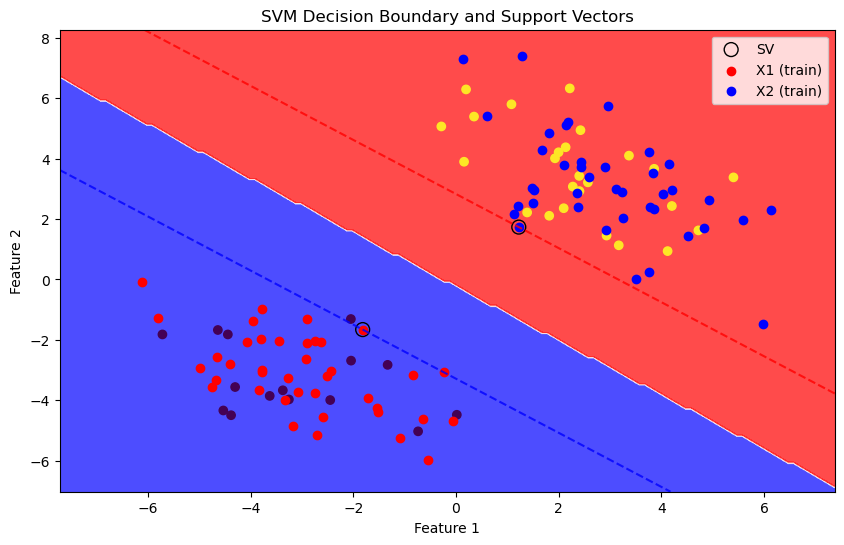

In [ ]:
plot_decision_boundary(line_best_model, X_test, y_test, line_best_model.support_vectors_x)

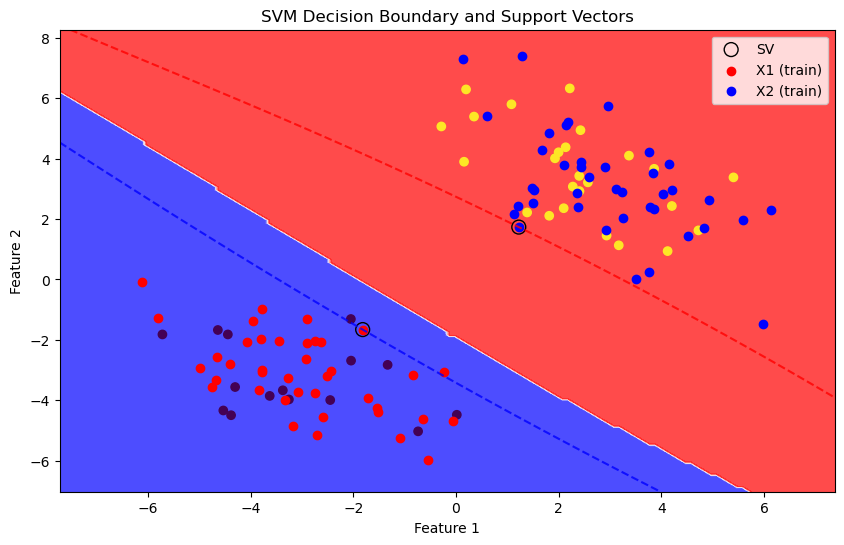

In [ ]:
plot_decision_boundary(poly_best_model, X_test, y_test, poly_best_model.support_vectors_x)

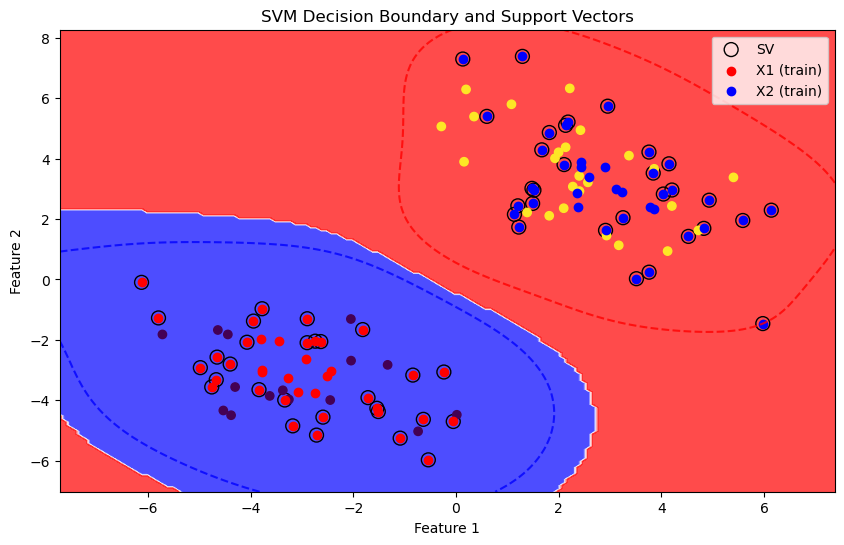

In [ ]:
plot_decision_boundary(gaus_best_model, X_test, y_test, gaus_best_model.support_vectors_x)

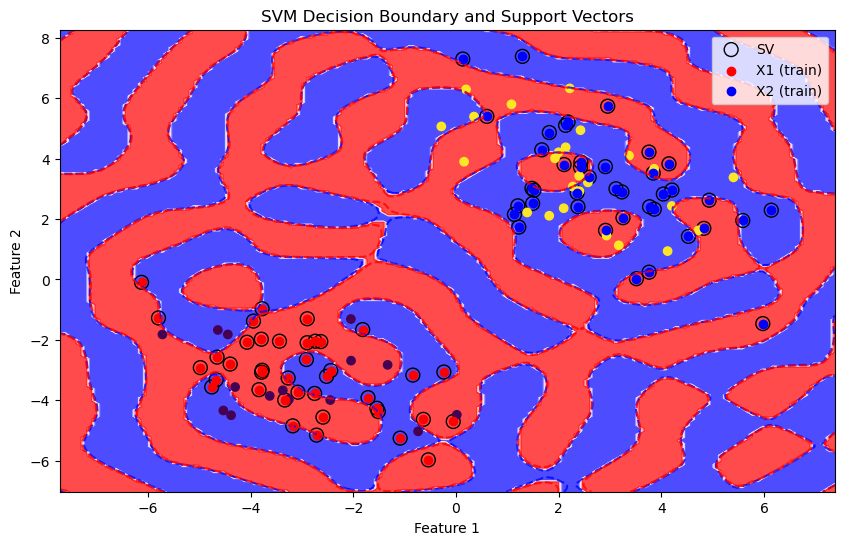

In [ ]:
plot_decision_boundary(perio_best_model, X_test, y_test, perio_best_model.support_vectors_x)